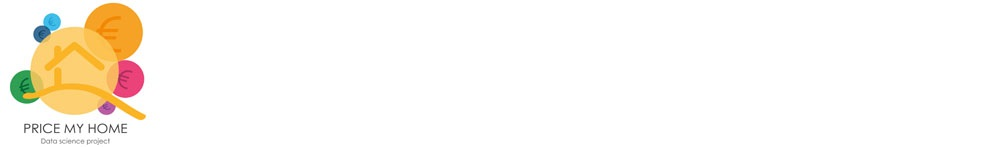

> ### <font color= "1F284B" >**MODELO**</font><font color= "3B4D90" >_Clustering y regresión.</font>

---------

##### <font color= "1F284B" >PASO 0. IMPORTAR BIBLIOTECAS.</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

---------

##### <font color= "1F284B" >PASO 1. ABRIR EL DATASET.</font>

In [2]:
pisos = pd.read_excel("dataset pisos madrid municipio.xlsx", index_col = 0)

In [3]:
pisos

,Distrito,Barrios,m2,Habitaciones,Baños,Precio/m2,Precio,Población,0-15 años,0-15 años%,...,Delitos Intervencon Policial Ratio,Delitos contra seguridad vial,Delitos contra seguridad vial Ratio,Precio feb 2021,Variación mensual,Variación trimestral,Variación anual,Máximo histórico(precio),Satisfacción de vivir en su barrio,Calidad de vida actual en su barrio
1,Carabanchel,Abrantes,99,4,1,2194.0,217206,31947,5136,16.076627,...,0.247285,37,0.115817,2216,-1.5,-0.7,-1.100,2908,68.4,66.2
2,Carabanchel,Abrantes,100,3,2,3250.0,325000,31947,5136,16.076627,...,0.247285,37,0.115817,2216,-1.5,-0.7,-1.100,2908,68.4,66.2
3,Carabanchel,Abrantes,87,2,2,1724.0,149988,31947,5136,16.076627,...,0.247285,37,0.115817,2216,-1.5,-0.7,-1.100,2908,68.4,66.2
4,Carabanchel,Abrantes,88,3,1,1578.0,138864,31947,5136,16.076627,...,0.247285,37,0.115817,2216,-1.5,-0.7,-1.100,2908,68.4,66.2
5,Carabanchel,Abrantes,62,3,1,2694.0,167028,31947,5136,16.076627,...,0.247285,37,0.115817,2216,-1.5,-0.7,-1.100,2908,68.4,66.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17733,Usera,Zofío,57,1,1,2509.0,143013,14412,1958,13.585901,...,0.263669,15,0.104080,1925,-3.5,-0.1,0.019,2319,60.1,61.8
17734,Usera,Zofío,56,1,1,2366.0,132496,14412,1958,13.585901,...,0.263669,15,0.104080,1925,-3.5,-0.1,0.019,2319,60.1,61.8
17735,Usera,Zofío,60,2,1,2317.0,139020,14412,1958,13.585901,...,0.263669,15,0.104080,1925,-3.5,-0.1,0.019,2319,60.1,61.8
17736,Usera,Zofío,51,3,1,2141.0,109191,14412,1958,13.585901,...,0.263669,15,0.104080,1925,-3.5,-0.1,0.019,2319,60.1,61.8


---------

##### <font color= "1F284B" >PASO 2. PREPROCESAMIENTO DE DATOS.</font>

<font color= "1F284B" >- Hacer dummies de la columna calidad del aire.</font>

In [4]:
for i in pisos['Calidad del aire'].unique():
       pisos[i] = pisos[['Calidad del aire']].apply(lambda x: 1 if i in x.values else 0, axis = 1)

In [5]:
pisos = pisos.drop(["Calidad del aire"], axis = 1)

<font color= "1F284B" >- Borrar variables categóricas que no influyen para el clustering. Las cinco últimas se borran porque la variable categórica "Calidad del aire", hecha dummies antes, las engloba.</font>

In [6]:
pisos = pisos.drop(["Distrito", "Barrios","PM2,5",'PM10','NO2','O3','SO2'], axis = 1)

<font color= "1F284B" >- Borrar variables de ratio que no influyen para el clustering.</font>

In [7]:
pisos = pisos.drop(["65 o más años %","16-64 años %","0-15 años%","Residuos Ratio","Delitos Intervencon Policial Ratio",
        "Defunciones Ratio","Nacimientos Ratio","Inmigración Ratio","Emigración Ratio", "Delitos contra seguridad vial Ratio"], axis = 1)

<font color= "1F284B" >- Borrar variables latitud y longitud.</font>

In [8]:
pisos = pisos.drop(["Latidud", "Longitud"], axis = 1)

<font color= "1F284B" >- Así queda el dataset limpio.</font>

In [9]:
pisos

,m2,Habitaciones,Baños,Precio/m2,Precio,Población,0-15 años,16-64 años,65 o más años,Edad promedio,...,Precio feb 2021,Variación mensual,Variación trimestral,Variación anual,Máximo histórico(precio),Satisfacción de vivir en su barrio,Calidad de vida actual en su barrio,Malo,Regular,Muy bueno
1,99,4,1,2194.0,217206,31947,5136,21245,5566,42.37,...,2216,-1.5,-0.7,-1.100,2908,68.4,66.2,1,0,0
2,100,3,2,3250.0,325000,31947,5136,21245,5566,42.37,...,2216,-1.5,-0.7,-1.100,2908,68.4,66.2,1,0,0
3,87,2,2,1724.0,149988,31947,5136,21245,5566,42.37,...,2216,-1.5,-0.7,-1.100,2908,68.4,66.2,1,0,0
4,88,3,1,1578.0,138864,31947,5136,21245,5566,42.37,...,2216,-1.5,-0.7,-1.100,2908,68.4,66.2,1,0,0
5,62,3,1,2694.0,167028,31947,5136,21245,5566,42.37,...,2216,-1.5,-0.7,-1.100,2908,68.4,66.2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17733,57,1,1,2509.0,143013,14412,1958,9953,2501,42.94,...,1925,-3.5,-0.1,0.019,2319,60.1,61.8,0,1,0
17734,56,1,1,2366.0,132496,14412,1958,9953,2501,42.94,...,1925,-3.5,-0.1,0.019,2319,60.1,61.8,0,1,0
17735,60,2,1,2317.0,139020,14412,1958,9953,2501,42.94,...,1925,-3.5,-0.1,0.019,2319,60.1,61.8,0,1,0
17736,51,3,1,2141.0,109191,14412,1958,9953,2501,42.94,...,1925,-3.5,-0.1,0.019,2319,60.1,61.8,0,1,0


In [10]:
pisos.columns

Index(['m2', 'Habitaciones', 'Baños', 'Precio/m2', 'Precio', 'Población',
       '0-15 años', '16-64 años', '65 o más años ', 'Edad promedio',
       'Densidad', 'Superficie',
       'Índice de la estructura de la población activa', 'Tasa de desempleo',
       'Nacimientos', 'Defunciones', 'Inmigración', 'Emigración',
       'Renta neta media anual de los hogares\n', 'Actividades economicas',
       'Educacion', 'Centros Universitarios', 'Sanidad', 'Bibliotecas',
       'Instalaciones deportivas(Polideportivos, no básicas',
       'Zonas verdes (m2)', 'Distancia al centro (km)', 'Metro', 'Tren',
       'Autobus', 'Monumentos', 'Ocio/cultura', 'Residuos generados',
       'Seguridad Percibida día', 'Seguridad Percibida de Noche',
       'Delitos intervencion policial', 'Delitos contra seguridad vial',
       'Precio feb 2021', 'Variación mensual', 'Variación trimestral',
       'Variación anual', 'Máximo histórico(precio)',
       'Satisfacción de vivir en su barrio',
       'Calidad de

---------

##### <font color= "1F284B" >PASO 3. CLUSTERING.</font>

<font color= "1F284B" >- Bibliotecas necesarias.</font>

In [11]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import MinMaxScaler

<font color= "1F284B" >- Hallar el número de clusters que deberíamos tener en el modelo KMEANS.</font>

In [12]:
pisos_cluster = pisos.copy()

In [13]:
model = KMeans(max_iter=3000, random_state=123456789)
visualizer = KElbowVisualizer(model, k=(2,30), metric='silhouette')

In [14]:
X_cluster = pisos_cluster.values

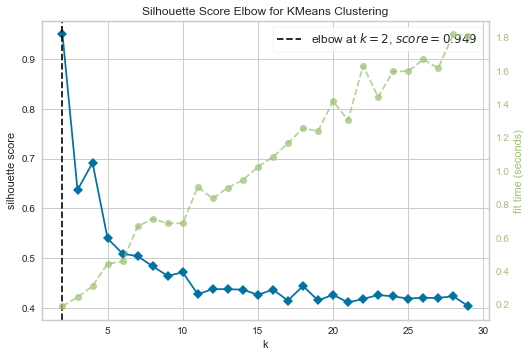

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [15]:
visualizer.fit(X_cluster) 
visualizer.poof()

In [16]:
scaler = MinMaxScaler()
X1_cluster = scaler.fit_transform(X_cluster)

#### <font color= "1F284B" >1. Probamos con dos clusters.</font>

In [17]:
pisos_2cluster = pisos.copy()

In [18]:
model_kmeans_2 = KMeans(n_clusters=2, max_iter=1000, random_state=123456789)

In [19]:
pisos_cluster['Clase'] = model_kmeans_2.fit_predict(X1_cluster)

In [20]:
cluster_center_2 = pd.DataFrame(model_kmeans_2.cluster_centers_)
cluster_center_2.columns = pisos_cluster.drop(["Clase"],axis=1).columns
cluster_center_2['total'] = cluster_center_2.sum(axis=1)

cluster_center_2['ordered_label'] = cluster_center_2.Precio.rank().astype(int)
cluster_center_2.sort_values(by='ordered_label').set_index('ordered_label')

,m2,Habitaciones,Baños,Precio/m2,Precio,Población,0-15 años,16-64 años,65 o más años,Edad promedio,...,Variación mensual,Variación trimestral,Variación anual,Máximo histórico(precio),Satisfacción de vivir en su barrio,Calidad de vida actual en su barrio,Malo,Regular,Muy bueno,total
ordered_label,,,,,,,,,,,,,,,,,,,,,
1,0.054038,0.214740,0.067455,0.023197,0.027664,0.347448,0.088963,0.444748,0.265081,0.640214,...,0.892620,0.904314,0.840846,0.340432,0.666612,0.696199,9.825474e-15,1.290907e-01,8.709093e-01,15.949352
2,0.045679,0.206177,0.057017,0.026323,0.028605,0.460388,0.232206,0.483256,0.329432,0.728343,...,0.823178,0.862899,0.803851,0.393636,0.618092,0.630699,1.000000e+00,9.853229e-16,5.218048e-15,16.449414


In [21]:
df_centroides_2 = scaler.inverse_transform(cluster_center_2.drop(["ordered_label", "total"], axis=1))

In [22]:
df_centroides_2_invertido =  pd.DataFrame(data = df_centroides_2, columns = [cluster_center_2.drop(["total", "ordered_label"], axis = 1)])
df_centroides_2_invertido

,m2,Habitaciones,Baños,Precio/m2,Precio,Población,0-15 años,16-64 años,65 o más años,Edad promedio,...,Precio feb 2021,Variación mensual,Variación trimestral,Variación anual,Máximo histórico(precio),Satisfacción de vivir en su barrio,Calidad de vida actual en su barrio,Malo,Regular,Muy bueno
0,130.636390,2.791623,1.876920,3923.894236,525301.213148,28508.572655,3981.415991,19183.939700,5303.134148,43.526660,...,3712.177273,-0.325005,-0.774360,-2.229541,4084.494705,74.331743,73.396119,9.825474e-15,1.290907e-01,8.709093e-01
1,110.582758,2.680298,1.741227,4377.811878,542210.622962,37381.827300,10007.228516,20771.662476,6572.073086,44.948171,...,4023.479138,-0.587565,-1.151067,-2.769404,4452.928019,72.924675,71.778263,1.000000e+00,9.853229e-16,5.218048e-15


#### <font color= "1F284B" >2. Probamos con tres clusters.</font>

In [23]:
model_kmeans_3 = KMeans(n_clusters=3, max_iter=3000, random_state=123456789)

In [24]:
pisos_cluster['Clase'] = model_kmeans_3.fit_predict(X1_cluster)

In [25]:
cluster_center_3 = pd.DataFrame(model_kmeans_3.cluster_centers_)
cluster_center_3.columns = pisos_cluster.drop(["Clase"],axis=1).columns
cluster_center_3['total'] = cluster_center_3.sum(axis=1)

cluster_center_3['ordered_label'] = cluster_center_3.Precio.rank().astype(int)
cluster_center_3.sort_values(by='ordered_label').set_index('ordered_label')

,m2,Habitaciones,Baños,Precio/m2,Precio,Población,0-15 años,16-64 años,65 o más años,Edad promedio,...,Variación mensual,Variación trimestral,Variación anual,Máximo histórico(precio),Satisfacción de vivir en su barrio,Calidad de vida actual en su barrio,Malo,Regular,Muy bueno,total
ordered_label,,,,,,,,,,,,,,,,,,,,,
1,0.036218,0.189017,0.035297,0.018619,0.014611,0.555178,0.153151,0.731041,0.356499,0.540745,...,0.882771,0.865246,0.765201,0.257718,0.491718,0.505229,9.436896e-16,1.665335e-16,1.000000e+00,18.173198
2,0.044959,0.205749,0.054942,0.025295,0.027278,0.447477,0.222084,0.473662,0.319747,0.717434,...,0.809957,0.865867,0.784287,0.375523,0.590482,0.605476,9.375648e-01,6.243523e-02,4.773959e-15,16.129046
3,0.063242,0.227105,0.084607,0.026134,0.034806,0.262739,0.062088,0.327019,0.231235,0.689901,...,0.916451,0.921045,0.898367,0.393188,0.777456,0.812627,5.662137e-15,1.253598e-01,8.746402e-01,15.294093


In [26]:
df_centroides_3 = scaler.inverse_transform(cluster_center_3.drop(["total", "ordered_label"], axis = 1))

In [27]:
df_centroides_3_invertido =  pd.DataFrame(data = df_centroides_3, columns = [cluster_center_3.drop(["total", "ordered_label"], axis = 1)])

In [28]:
df_centroides_3_invertido

,m2,Habitaciones,Baños,Precio/m2,Precio,Población,0-15 años,16-64 años,65 o más años,Edad promedio,...,Precio feb 2021,Variación mensual,Variación trimestral,Variación anual,Máximo histórico(precio),Satisfacción de vivir en su barrio,Calidad de vida actual en su barrio,Malo,Regular,Muy bueno
0,87.886595,2.457227,1.458866,3259.128906,290702.468371,44829.138643,6681.602753,30987.813176,7105.796788,41.922219,...,3044.462144,-0.362243,-1.129719,-3.333427,3511.700426,69.259816,68.679154,9.436896e-16,1.665335e-16,1.000000e+00
1,152.717329,2.952360,2.099885,4350.261889,653648.137162,21853.360967,2850.838515,14330.008780,4635.728987,44.328097,...,4130.791163,-0.234899,-0.622177,-1.390135,4449.824986,77.546215,76.271880,5.662137e-15,1.253598e-01,8.746402e-01
2,108.856995,2.674741,1.714249,4228.460617,518357.774093,36367.508031,9581.391839,20376.094041,6381.085881,44.772211,...,3891.176295,-0.637551,-1.124072,-3.054899,4327.500000,72.123964,71.155268,9.375648e-01,6.243523e-02,4.773959e-15


#### <font color= "1F284B" >3. Probamos con cuatro clusters.</font>

In [29]:
model_kmeans_4 = KMeans(n_clusters=4, max_iter=3000, random_state=123456789)

In [30]:
pisos_cluster['Clase'] = model_kmeans_4.fit_predict(X1_cluster)

In [31]:
cluster_center_4 = pd.DataFrame(model_kmeans_4.cluster_centers_)
cluster_center_4.columns = pisos_cluster.drop(["Clase"],axis=1).columns
cluster_center_4['total'] = cluster_center_4.sum(axis=1)

cluster_center_4['ordered_label'] = cluster_center_4.Precio.rank().astype(int)
cluster_center_4.sort_values(by='ordered_label').set_index('ordered_label')

,m2,Habitaciones,Baños,Precio/m2,Precio,Población,0-15 años,16-64 años,65 o más años,Edad promedio,...,Variación mensual,Variación trimestral,Variación anual,Máximo histórico(precio),Satisfacción de vivir en su barrio,Calidad de vida actual en su barrio,Malo,Regular,Muy bueno,total
ordered_label,,,,,,,,,,,,,,,,,,,,,
1,0.032686,0.187341,0.023373,0.014215,0.009488,0.443038,0.111600,0.567108,0.342533,0.638435,...,0.817003,0.912545,0.769276,0.175262,0.398463,0.361618,8.818917e-01,1.181083e-01,2.553513e-15,14.898766
2,0.036218,0.189017,0.035297,0.018619,0.014611,0.555178,0.153151,0.731041,0.356499,0.540745,...,0.882771,0.865246,0.765201,0.257718,0.491718,0.505229,9.436896e-16,1.665335e-16,1.000000e+00,18.173198
3,0.063242,0.227105,0.084607,0.026134,0.034806,0.262739,0.062088,0.327019,0.231235,0.689901,...,0.916451,0.921045,0.898367,0.393188,0.777456,0.812627,5.662137e-15,1.253598e-01,8.746402e-01,15.294093
4,0.058723,0.226394,0.090346,0.037720,0.047229,0.452456,0.345987,0.368866,0.294193,0.806029,...,0.802056,0.813519,0.801122,0.600109,0.805823,0.878955,1.000000e+00,9.714451e-17,5.551115e-16,17.508758


In [32]:
df_centroides_4 = scaler.inverse_transform(cluster_center_4.drop(["total", "ordered_label"], axis = 1))

In [33]:
df_centroides_4_invertido =  pd.DataFrame(data = df_centroides_4, columns = [cluster_center_4.drop(["total", "ordered_label"], axis = 1)])

In [34]:
df_centroides_4_invertido

,m2,Habitaciones,Baños,Precio/m2,Precio,Población,0-15 años,16-64 años,65 o más años,Edad promedio,...,Precio feb 2021,Variación mensual,Variación trimestral,Variación anual,Máximo histórico(precio),Satisfacción de vivir en su barrio,Calidad de vida actual en su barrio,Malo,Regular,Muy bueno
0,87.886595,2.457227,1.458866,3259.128906,290702.468371,44829.138643,6681.602753,30987.813176,7105.796788,41.922219,...,3044.462144,-0.362243,-1.129719,-3.333427,3511.700426,69.259816,68.679154,9.436896e-16,1.665335e-16,1.000000e+00
1,152.717329,2.952360,2.099885,4350.261889,653648.137162,21853.360967,2850.838515,14330.008780,4635.728987,44.328097,...,4130.791163,-0.234899,-0.622177,-1.390135,4449.824986,77.546215,76.271880,5.662137e-15,1.253598e-01,8.746402e-01
2,141.876340,2.943116,2.174498,6032.637278,876925.923605,36758.686452,14793.626271,16055.350096,5877.183567,46.201242,...,5562.425666,-0.667427,-1.600227,-2.809228,5882.754603,78.368865,77.910187,1.000000e+00,9.714451e-17,5.551115e-16
3,79.413869,2.435432,1.303847,2619.688534,198624.988973,36018.696888,4933.677775,24228.872090,6830.412154,43.497954,...,2400.934575,-0.610912,-0.699487,-3.273963,2940.690027,66.555428,65.131953,8.818917e-01,1.181083e-01,2.553513e-15


<font color= "1F284B" > Como tenemos cuatro grupos, que son los mejores diferenciados, y el grupo 0 y 2 son muy parecidos y también 1 y 3, agrupamos esos clusters.</font>

In [35]:
relabel = cluster_center_4.ordered_label.to_dict()
pisos_cluster.clase = pisos_cluster.Clase.map(lambda x: relabel[x])

<ipython-input-35-347d167cfdc0>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  pisos_cluster.clase = pisos_cluster.Clase.map(lambda x: relabel[x])


In [36]:
pisos_cluster["Clase"] = pisos_cluster["Clase"].astype(float)

In [37]:
pisos_cluster["Clase"] = pisos_cluster["Clase"].replace({3:0,2:1})

In [38]:
pisos_cluster["Clase"].value_counts()

1.0    10587
0.0     7132
Name: Clase, dtype: int64

<font color= "1F284B" > Hacemos la comparativa entre clases.</font>

In [39]:
pisos["Clase"]= pisos_cluster["Clase"]

In [40]:
pisos_class0 = pisos[pisos["Clase"]==0]

In [41]:
pisos_class0 =pisos_class0.mean().to_frame()

In [42]:
pisos_class1 = pisos[pisos["Clase"]==1]

In [43]:
pisos_class1 = pisos_class1.mean().to_frame()

In [44]:
frames = [pisos_class0, pisos_class1]

In [45]:
comparativa = pd.concat(frames, axis= 1, sort=False)

In [46]:
comparativa.columns = ['Clase 0', 'Clase1']

In [47]:
comparativa

,Clase 0,Clase1
m2,83.038418,148.991027
Habitaciones,2.444756,2.949183
Baños,1.370163,2.125531
Precio/m2,2893.234885,4928.533736
Precio,238014.836091,730393.944744
Población,39787.717891,26976.670634
0-15 años,5681.423023,6955.854539
16-64 años,27120.281127,14923.049022
65 o más años,6948.219013,5062.446019
Edad promedio,42.823870,44.971941


<font color= "1F284B" > Hacemos una PCA para poder representar los grupos.</font>

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [49]:
X_PCA = pisos_cluster.drop(["Clase"],axis=1).values
y_PCA = pisos_cluster["Clase"].values

In [50]:
X_PCA_train, X_PCA_test, y_PCA_train, y_PCA_test = train_test_split(X_PCA, y_PCA, test_size=0.30)

In [51]:
pca = PCA()
X_train_pca = pca.fit_transform(X_PCA_train)
len(pca.explained_variance_ratio_)

47

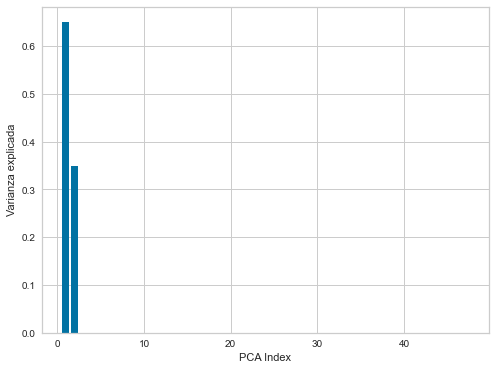

In [52]:
plt.figure(figsize=(8,6))
plt.bar(range(1, 48), pca.explained_variance_ratio_)
plt.ylabel('Varianza explicada')
plt.xlabel('PCA Index')
plt.show()

In [53]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_PCA_train)
X_test_pca = pca.transform(X_PCA_test)

C:\Users\nuria\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


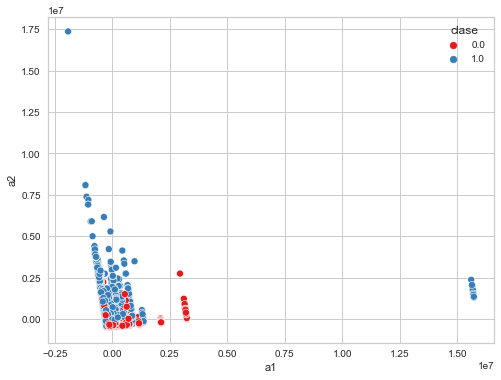

In [54]:
df_PCA = pd.DataFrame()
df_PCA["a1"]= X_train_pca[:,0]
df_PCA["a2"] = X_train_pca[:,1]
df_PCA["clase"]=y_PCA_train
plt.figure(figsize=(8,6))
sns.scatterplot(df_PCA["a1"],df_PCA["a2"], hue = df_PCA["clase"], palette="Set1")
plt.show()

--------------------------

##### <font color= "1F284B" >PASO 4. VEMOS QUÉ ATRIBUTOS SON LOS MAS IMPORTANTES DEL DATASET CON RANDOM FOREST.</font>

<font color= "1F284B" >- Bibliotecas necesarias.</font>

In [55]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.cluster import KMeans

<font color= "1F284B" >- Elegir las variables data y las de destino.</font>

In [56]:
X_clf_RF = pisos.drop(["Clase","Precio","Precio/m2"],axis=1).values
y_clf_RF = pisos["Clase"].values

<font color= "1F284B" >- Definir los datos que son para entrenamiento y los que son para testeo.</font>

In [57]:
X_clf_RF_train, X_clf_RF_test, y_clf_RF_train, y_clf_RF_test = train_test_split(X_clf_RF, y_clf_RF, test_size=0.3)

In [58]:
clf_RF = RandomForestClassifier(criterion="entropy")
clf_RF = clf_RF.fit(X_clf_RF_train, y_clf_RF_train)
yhat_RF = clf_RF.predict(X_clf_RF_test)
accuracy_score(y_clf_RF_test,yhat_RF)

1.0

In [59]:
clf_RF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

<font color= "1F284B" >- Buscar mediante un Grid Search los parámetros adecuados para el Random Forest.</font>

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, make_scorer,recall_score

In [61]:
params={'n_estimators': [50,75,100,200,300],
        'criterion':['gini','entropy'],
        'max_depth': [3,4,5], 
        'max_features': [2, 3], 
        'max_leaf_nodes': [8], 
        'min_samples_split': [2,5] 
        }

In [62]:
scorers = {"f1_macro","accuracy","recall_macro"}
clf_Grid = RandomForestClassifier()
grid_solver = GridSearchCV(estimator = clf_Grid, # model to train
                   param_grid = params, # param_grid
                   scoring=scorers,
                   cv = 5,
                   refit="accuracy",
                   n_jobs=-1)

model_result_Grid = grid_solver.fit(X_clf_RF_train,y_clf_RF_train)

print(model_result_Grid.cv_results_["mean_test_recall_macro"].mean())
print(model_result_Grid.cv_results_["mean_test_f1_macro"].mean())
print(model_result_Grid.cv_results_["mean_test_accuracy"].mean())
print(model_result_Grid.best_score_)
print(model_result_Grid.best_params_)

0.9955518084709702
0.9962651970324227
0.9964094418657061
0.9970167791343242
{'criterion': 'entropy', 'max_depth': 3, 'max_features': 2, 'max_leaf_nodes': 8, 'min_samples_split': 2, 'n_estimators': 50}


<font color= "1F284B" >- Una vez definidos los mejores parámetros ejecutamos nuestro modelo con ellos.</font>

In [63]:
clf_RF = RandomForestClassifier(criterion ="entropy", n_estimators = 200,
        max_depth = 5,
        max_features= 3, 
        max_leaf_nodes= 8, 
        min_samples_split =2)
clf_RF = clf_RF.fit(X_clf_RF_train, y_clf_RF_train)
yhat_RF = clf_RF.predict(X_clf_RF_test)
accuracy_score(y_clf_RF_test,yhat_RF)

0.9973664409330324

<font color= "1F284B" >- Ploteamos los más importantes.</font>

In [64]:
clf_RF.feature_importances_

array([3.09294533e-03, 3.04107716e-04, 2.70856358e-03, 2.53428013e-02,
       1.62109903e-02, 5.10378630e-02, 1.03419661e-02, 2.49863249e-02,
       3.36588676e-03, 6.37750184e-03, 1.32752176e-02, 6.25066597e-02,
       2.81638810e-02, 1.80131830e-02, 6.12251887e-02, 7.65340350e-02,
       6.55150607e-02, 9.87810708e-03, 8.31241887e-03, 1.03712159e-03,
       1.01778671e-02, 1.98655202e-03, 1.22094225e-03, 1.44609064e-02,
       1.40048499e-02, 2.14239522e-05, 1.93339853e-03, 0.00000000e+00,
       5.89216301e-03, 1.22667092e-02, 3.22532141e-02, 3.51222390e-02,
       7.76209532e-02, 1.85837950e-02, 2.95411826e-02, 4.30001703e-02,
       4.48284138e-03, 7.82520944e-03, 6.66668266e-03, 3.14269571e-02,
       7.00511315e-02, 7.95396349e-02, 4.79373158e-03, 5.20806946e-04,
       8.37681363e-03])

In [65]:
from sklearn.ensemble import RandomForestClassifier

Feature ranking:
1. feature 15 (0.120725)
2. feature 16 (0.110946)
3. feature 41 (0.100850)
4. feature 32 (0.086292)
5. feature 14 (0.075215)
6. feature 11 (0.063376)
7. feature 40 (0.052106)
8. feature 5 (0.045288)
9. feature 34 (0.035209)
10. feature 35 (0.034726)
11. feature 30 (0.029422)
12. feature 39 (0.027910)
13. feature 12 (0.026825)
14. feature 31 (0.021451)
15. feature 17 (0.017422)
16. feature 4 (0.016236)
17. feature 3 (0.015277)
18. feature 7 (0.013529)
19. feature 29 (0.012940)
20. feature 13 (0.008004)
21. feature 6 (0.007818)
22. feature 18 (0.007521)
23. feature 33 (0.007268)
24. feature 24 (0.007201)
25. feature 38 (0.007022)
26. feature 20 (0.006903)
27. feature 23 (0.005160)
28. feature 9 (0.005140)
29. feature 10 (0.004374)
30. feature 44 (0.004286)
31. feature 36 (0.004028)
32. feature 37 (0.003770)
33. feature 28 (0.002775)
34. feature 42 (0.002622)
35. feature 8 (0.002268)
36. feature 19 (0.001944)
37. feature 26 (0.001797)
38. feature 21 (0.001585)
39. feature

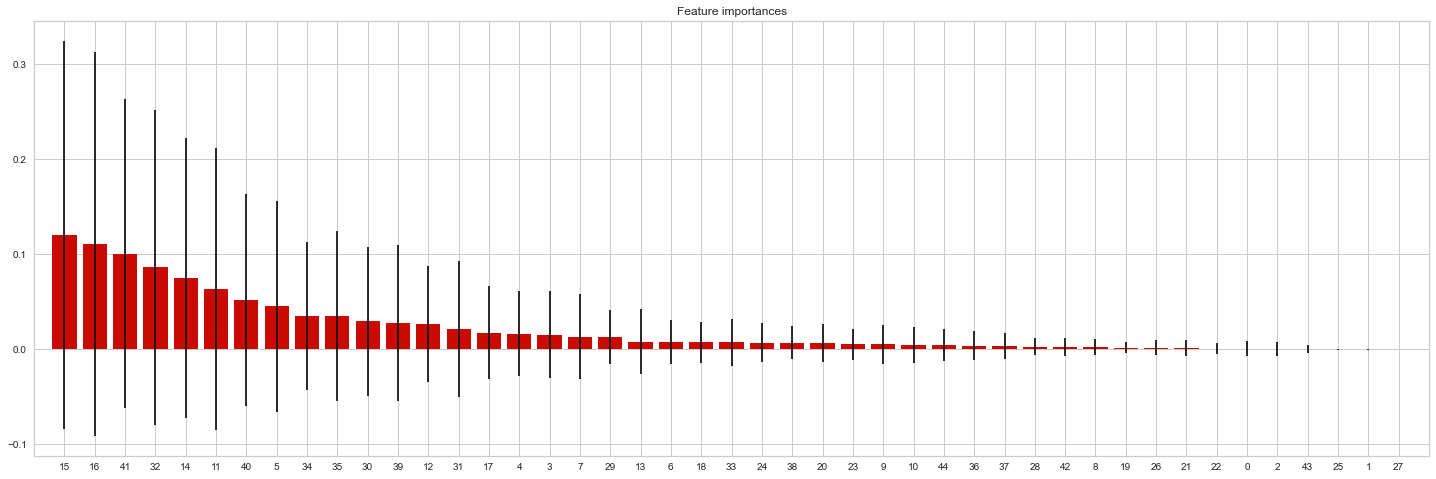

In [66]:
clf_RF = RandomForestClassifier(n_estimators=250)
clf_RF.fit(X_clf_RF, y_clf_RF)
importances = clf_RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_RF.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X_clf_RF.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.figure(figsize=(25,8))
plt.title("Feature importances")
plt.bar(range(X_clf_RF.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(X_clf_RF.shape[1]), indices)
plt.xlim([-1, X_clf_RF.shape[1]])
plt.show()

------------------------

##### <font color= "1F284B" >PASO 4. REGRESIONES.</font>

#### <font color= "1F284B" >1. Regresión multilineal.</font>

<font color= "1F284B" >- Importar bibliotecas.</font>

In [67]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#### <font color= "1F284B" >1.1. Regresión multilineal con la clase 0.</font>

In [68]:
clase_0 = pisos[pisos["Clase"]==0]

In [69]:
clase_0.to_excel("clase_0.xlsx",index=True)

<font color= "1F284B" >- Elegir las variables data y las de destino.</font>

In [70]:
X_Rm_0 = clase_0.drop(["Precio", "Clase", "Precio/m2"],axis=1).values
y_Rm_0 = clase_0["Precio"].values

<font color= "1F284B" >- Definir los datos que son para entrenamiento y los que son para testeom.</font>

In [71]:
X_Rm_0_train, X_Rm_0_test, y_Rm_0_train, y_Rm_0_test = train_test_split(X_Rm_0, y_Rm_0, test_size=0.30)

In [72]:
regresion_multilineal_Rm_0 = linear_model.LinearRegression()
regresion_multilineal_Rm_0.fit(X_Rm_0_train, y_Rm_0_train)

LinearRegression()

In [73]:
print ('w_1: ', regresion_multilineal_Rm_0.coef_)
print ('w_0: ',regresion_multilineal_Rm_0.intercept_)

w_1:  [ 2.21926475e+03  6.67036309e+03  6.74554036e+04 -1.97134076e+02
  2.14245920e+02  1.86934240e+02  1.97496781e+02  1.57820030e+04
  5.48106392e+01 -6.47017100e+02  5.19921067e+03  4.89724709e+03
 -2.96305750e+02 -7.35051540e+02 -7.92976459e+01  1.47660521e+02
  1.21214710e+00 -1.02311217e+01  4.16967806e+02 -4.38200621e+03
  2.49101610e+03 -5.66782609e+03  1.99187640e+04  6.87002276e-03
 -3.99406055e-01  2.67776308e+04  4.99845741e+04  2.13549356e-08
 -2.13008240e+02  3.42413233e+02  2.83668157e+00 -1.07519352e+04
 -8.83591414e+03 -1.67307254e+02  5.62482355e+03  5.12586841e+01
  3.53403200e+03 -2.54356555e+03  1.00963214e+04  6.37496568e+01
 -1.78512947e+04  3.80121099e+04  7.71556467e+04 -1.34497982e+05
  5.73423353e+04]
w_0:  -1684312.7472811358


In [74]:
yhat_Rm_0 = regresion_multilineal_Rm_0.predict(X_Rm_0_test)

for i,j in zip(yhat_Rm_0,y_Rm_0_test):
    print("Predicción: ",i, "Valor real: ",j)

Predicción:  239290.19405684923 Valor real:  265900
Predicción:  101753.1240987212 Valor real:  99876
Predicción:  174570.50490978477 Valor real:  159000
Predicción:  98756.72176708211 Valor real:  115500
Predicción:  125237.61955607147 Valor real:  118016
Predicción:  193633.00874761143 Valor real:  85008
Predicción:  417845.169148464 Valor real:  475011
Predicción:  161750.54536355403 Valor real:  224000
Predicción:  411288.16413477645 Valor real:  348244
Predicción:  557671.4169919726 Valor real:  470000
Predicción:  121739.07566597615 Valor real:  137472
Predicción:  952248.7682915789 Valor real:  1799889
Predicción:  155583.56609844626 Valor real:  265040
Predicción:  188613.72707673744 Valor real:  159984
Predicción:  313053.98669719393 Valor real:  229990
Predicción:  201171.30737973074 Valor real:  247009
Predicción:  167826.47796973796 Valor real:  125000
Predicción:  211730.93036333495 Valor real:  143000
Predicción:  84255.88044200116 Valor real:  105000
Predicción:  140061.

Predicción:  158858.9220213911 Valor real:  193214
Predicción:  280096.0218873585 Valor real:  224900
Predicción:  241571.38825796894 Valor real:  299000
Predicción:  129826.42820907407 Valor real:  104890
Predicción:  443147.1114216598 Valor real:  225012
Predicción:  203006.87393513904 Valor real:  158064
Predicción:  115532.29336096183 Valor real:  122502
Predicción:  157247.3115996814 Valor real:  126000
Predicción:  370176.1885333753 Valor real:  424992
Predicción:  82384.31282998831 Valor real:  89000
Predicción:  115133.41684601945 Valor real:  152020
Predicción:  272663.78365562926 Valor real:  244970
Predicción:  560619.2398886422 Valor real:  768960
Predicción:  244730.09156456613 Valor real:  180960
Predicción:  100055.80326605984 Valor real:  176385
Predicción:  378448.8869021835 Valor real:  315000
Predicción:  115034.15526936413 Valor real:  136584
Predicción:  312928.4949724546 Valor real:  180000
Predicción:  230570.80298684468 Valor real:  138985
Predicción:  194915.11

Predicción:  447661.29242816125 Valor real:  299500
Predicción:  314102.77812689194 Valor real:  140000
Predicción:  159930.15713263885 Valor real:  134980
Predicción:  208241.11501758243 Valor real:  150040
Predicción:  149879.02737714327 Valor real:  134000
Predicción:  412417.9819427517 Valor real:  379947
Predicción:  143931.72312454158 Valor real:  149000
Predicción:  68890.63958151941 Valor real:  84623
Predicción:  84501.75721985125 Valor real:  125001
Predicción:  326855.31456834567 Valor real:  182496
Predicción:  205622.40572599112 Valor real:  157010
Predicción:  123497.04127475224 Valor real:  115992
Predicción:  277267.1479597383 Valor real:  215004
Predicción:  113713.29509454523 Valor real:  99892
Predicción:  155082.0405160787 Valor real:  199004
Predicción:  157710.89238678315 Valor real:  155000
Predicción:  94318.19227536884 Valor real:  99818
Predicción:  328231.0206590791 Valor real:  329936
Predicción:  201544.29456815333 Valor real:  250000
Predicción:  108475.62

Predicción:  63248.48583337781 Valor real:  84500
Predicción:  97643.3882979427 Valor real:  84000
Predicción:  280801.23808449623 Valor real:  119000
Predicción:  449815.75771659263 Valor real:  307496
Predicción:  231716.8819305899 Valor real:  124989
Predicción:  550308.0955734721 Valor real:  498960
Predicción:  163335.1580767457 Valor real:  158000
Predicción:  411051.0407020275 Valor real:  429000
Predicción:  274785.8611360055 Valor real:  389970
Predicción:  114845.88990141335 Valor real:  115040
Predicción:  138578.3457403055 Valor real:  120500
Predicción:  47906.52669843589 Valor real:  94000
Predicción:  91163.18789870688 Valor real:  108000
Predicción:  171906.9354500703 Valor real:  123000
Predicción:  85358.9281121816 Valor real:  108000
Predicción:  842726.0442466636 Valor real:  1425060
Predicción:  243073.7374049353 Valor real:  210012
Predicción:  407968.346792361 Valor real:  480000
Predicción:  217084.97774373484 Valor real:  282920
Predicción:  135298.96959670098 

Predicción:  86733.59082025499 Valor real:  89000
Predicción:  185059.60574602825 Valor real:  139808
Predicción:  260567.32362672337 Valor real:  239464
Predicción:  58135.215535054915 Valor real:  169000
Predicción:  236403.37431281828 Valor real:  178992
Predicción:  232619.83096473222 Valor real:  269025
Predicción:  104037.0931167372 Valor real:  172500
Predicción:  126913.31329806545 Valor real:  135905
Predicción:  135335.3130010676 Valor real:  89500
Predicción:  395081.51211587735 Valor real:  589992
Predicción:  75121.9471484425 Valor real:  80000
Predicción:  172212.2170601713 Valor real:  108985
Predicción:  114206.05205780058 Valor real:  88970
Predicción:  376833.9827709461 Valor real:  375012
Predicción:  316977.02901637484 Valor real:  270000
Predicción:  64439.541235259036 Valor real:  128000
Predicción:  316334.61172729474 Valor real:  190020
Predicción:  136333.94328535371 Valor real:  152000
Predicción:  227968.47495177272 Valor real:  290000
Predicción:  238426.764

In [75]:
mean_squared_error(yhat_Rm_0,y_Rm_0_test)

8852881050.574594

In [76]:
r2_sin_ajustar_Rm_0 = regresion_multilineal_Rm_0.score(X_Rm_0_test, y_Rm_0_test) 
r2_ajustada_Rm_0 = 1 - (1-regresion_multilineal_Rm_0.score(X_Rm_0_test, y_Rm_0_test))*(len(y_Rm_0_test)-1)/(len(y_Rm_0_test)-X_Rm_0_test.shape[1]-1)

r2_sin_ajustar_Rm_0, r2_ajustada_Rm_0

(0.8058978449055562, 0.8017265951542429)

#### <font color= "1F284B" > Método de validación Hold Out y métrica .</font>

<font color= "1F284B" >- Clase 0.</font>

In [77]:
lista_hold_Rm_0 = []
for i in range(100):
    X_train_hold_Rm_0, X_test_hold_Rm_0, y_train_hold_Rm_0, y_test_hold_Rm_0 = train_test_split( X_Rm_0, y_Rm_0, test_size=0.3)

    regresion_multilineal_hold_Rm_0 = linear_model.LinearRegression()
    regresion_multilineal_hold_Rm_0.fit(X_train_hold_Rm_0, y_train_hold_Rm_0)
    yhat_hold_Rm_0 = regresion_multilineal_hold_Rm_0.predict(X_test_hold_Rm_0)

    for i,j in zip(yhat_hold_Rm_0,y_test_hold_Rm_0):
        lista_hold_Rm_0.append((abs(i - j )/ j))

<font color= "1F284B" >- Media clase 0.</font>

In [78]:
np.mean(lista_hold_Rm_0)

0.25726353532793694

<font color= "1F284B" >- Mediana clase 0.</font>

In [79]:
np.median(lista_hold_Rm_0)

0.17903446454246258

<font color= "1F284B" >- Desviación estándar clase 0.</font>

In [80]:
np.std(lista_hold_Rm_0)

0.2927029506298397

In [81]:
lista_hold_Rm_0_R2 = []
for i in range(100):
    X_train_hold_Rm_0_R2, X_test_hold_Rm_0_R2, y_train_hold_Rm_0_R2, y_test_hold_Rm_0_R2 = train_test_split( X_Rm_0, y_Rm_0, test_size=0.3)

    regresion_multilineal_hold_Rm_0_R2 = linear_model.LinearRegression()
    regresion_multilineal_hold_Rm_0_R2.fit(X_train_hold_Rm_0_R2, y_train_hold_Rm_0_R2)
    yhat_hold_Rm_0_R2 = regresion_multilineal_hold_Rm_0_R2.predict(X_test_hold_Rm_0_R2)
    
    r2_ajustada_hold_Rm_0_R2 = 1 - (1-regresion_multilineal_hold_Rm_0_R2.score(X_test_hold_Rm_0_R2, y_test_hold_Rm_0_R2))*(len(y_test_hold_Rm_0_R2)-1)/(len(y_test_hold_Rm_0_R2)-X_test_hold_Rm_0_R2.shape[1]-1)
    lista_hold_Rm_0_R2.append(r2_ajustada_hold_Rm_0_R2)

In [82]:
np.mean(lista_hold_Rm_0_R2)

0.783198214385937

<font color= "1F284B" >- Ploteamos clase 0.</font>

In [83]:
lista_hold_Rm_0 = []
lista_hold_Rm_0_yhat = []
linea_true = []
for i in range(100):
    X_train_hold_Rm_0, X_test_hold_Rm_0, y_train_hold_Rm_0, y_test_hold_Rm_0 = train_test_split( X_Rm_0, y_Rm_0, test_size=0.3)

    regresion_multilineal_hold_Rm_0 = linear_model.LinearRegression()
    regresion_multilineal_hold_Rm_0.fit(X_train_hold_Rm_0, y_train_hold_Rm_0)
    yhat_hold_Rm_0 = regresion_multilineal_hold_Rm_0.predict(X_test_hold_Rm_0)
    lista_hold_Rm_0_yhat.extend(yhat_hold_Rm_0)
    linea_true.extend(y_test_hold_Rm_0)        

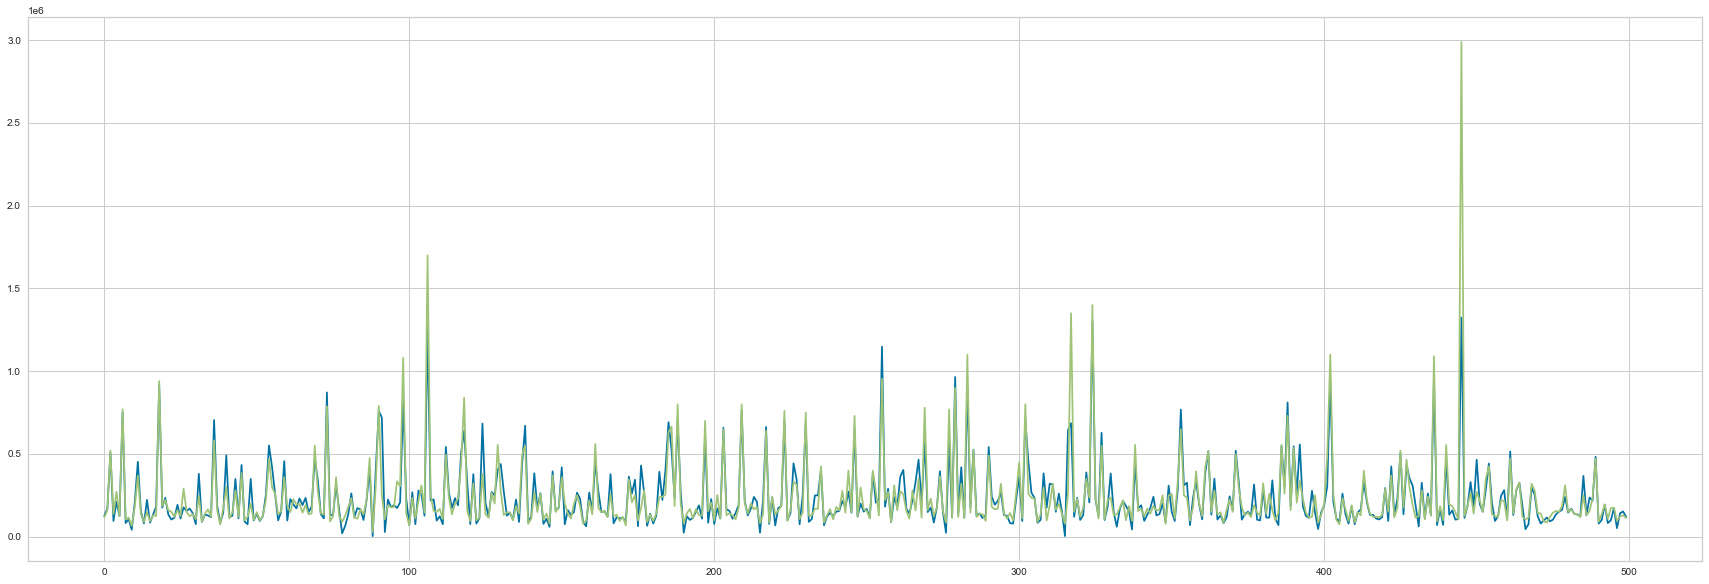

In [84]:
fig, ax = plt.subplots(figsize=(30,10))
plt.plot(lista_hold_Rm_0_yhat[:500])
plt.plot(linea_true[:500])
plt.show()

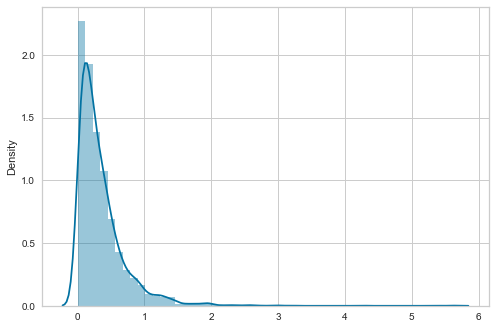

In [85]:
############NO SALE!!! sns.distplot(lista_hold_Rm_0) 

<font color= "1F284B" > Generalmente, en una distribución normal, la moda y la media coinciden. Como nuestra curva tiene esta forma decidimos coger la mediana.</font>

In [86]:
#### Poner más filtros en el clustering para ajustar la desviación 

#### <font color= "1F284B" >1.2. Regresión multilineal con la clase 1.</font>

In [87]:
clase_1 = pisos[pisos["Clase"]==1]

In [88]:
clase_1.to_excel("clase_1.xlsx",index=True)

<font color= "1F284B" >- Elegir las variables data y las de destino.</font>

In [89]:
X_Rm_1 = clase_1.drop(["Precio", "Clase", "Precio/m2"],axis=1).values
y_Rm_1 = clase_1["Precio"].values

<font color= "1F284B" >- Definir los datos que son para entrenamiento y los que son para testeom.</font>

In [90]:
X_Rm_1_train, X_Rm_1_test, y_Rm_1_train, y_Rm_1_test = train_test_split(X_Rm_1, y_Rm_1, test_size=0.30)

<font color= "1F284B" >- Entrenar los datos.</font>

In [91]:
regresion_multilineal_Rm_1 = linear_model.LinearRegression()
regresion_multilineal_Rm_1 = regresion_multilineal_Rm_1.fit(X_Rm_1_train, y_Rm_1_train)

In [92]:
print ('w_1: ', regresion_multilineal_Rm_1.coef_)
print ('w_0: ',regresion_multilineal_Rm_1.intercept_)

w_1:  [ 2.84651503e+03  8.41158122e+03  1.41750847e+05 -4.26559869e+02
  4.30199650e+02  4.35035226e+02  5.14843842e+02 -1.82843273e+04
 -2.94245945e+02  1.34132390e+03 -4.13976414e+03  6.88217817e+04
  6.79875896e+02 -1.26952699e+03  3.02401534e+02 -5.89577444e+02
 -9.31250129e-01  2.55557425e+01  4.15386979e+03 -4.07011777e+03
 -4.64325087e+03 -2.43177860e+04  2.56950845e+04 -1.71605925e-02
  4.67277766e+03 -4.77110942e+04 -8.67792911e+02 -1.68582119e-07
  1.15812822e+03 -1.11909021e+03 -5.07609796e+00  5.51870699e+03
 -4.20446135e+03 -2.46025164e+02 -1.09742563e+04  4.79440855e+02
  1.57753110e+03  3.47118048e+04 -2.36693313e+04 -1.84614773e+02
 -1.02635910e+04  1.45708900e+04  5.43096278e+04 -7.97122860e+04
  2.54026581e+04]
w_0:  -1070024.0007930733


<font color= "1F284B" >- Predecir los datos.</font>

In [93]:
yhat_Rm_1 = regresion_multilineal_Rm_1.predict(X_Rm_1_test)

for i,j in zip(yhat_Rm_1,y_Rm_1_test):
    print("Predicción: ",i, "Valor real: ",j)

Predicción:  569369.3675789759 Valor real:  549900
Predicción:  688542.7276591812 Valor real:  425040
Predicción:  2990532.3600754035 Valor real:  2975280
Predicción:  282808.7663224172 Valor real:  264972
Predicción:  324674.05105163716 Valor real:  349980
Predicción:  367122.7541918624 Valor real:  350020
Predicción:  217748.11947209202 Valor real:  198000
Predicción:  509627.54468147457 Valor real:  360000
Predicción:  599901.3612743393 Valor real:  650025
Predicción:  1034668.0309331715 Valor real:  1150000
Predicción:  1361921.7036595475 Valor real:  1695000
Predicción:  405737.0451509394 Valor real:  205045
Predicción:  1639533.7558311718 Valor real:  2300000
Predicción:  96888.33351700194 Valor real:  284925
Predicción:  219299.17923099734 Valor real:  270000
Predicción:  590667.9109223227 Valor real:  419958
Predicción:  49456.43034221232 Valor real:  177216
Predicción:  1099420.382640345 Valor real:  979992
Predicción:  751078.0098961536 Valor real:  685000
Predicción:  307397

Predicción:  435839.0888456255 Valor real:  399900
Predicción:  1457967.9384531882 Valor real:  1425000
Predicción:  541160.1450214311 Valor real:  629990
Predicción:  804578.7513683895 Valor real:  890000
Predicción:  133149.14875237085 Valor real:  325000
Predicción:  754003.1053056307 Valor real:  694950
Predicción:  1525204.5963269435 Valor real:  990028
Predicción:  433762.93778709136 Valor real:  245025
Predicción:  690289.7320111156 Valor real:  830025
Predicción:  1637457.443412844 Valor real:  1499850
Predicción:  372203.00288418494 Valor real:  510867
Predicción:  571963.8535428736 Valor real:  360000
Predicción:  961264.6386391595 Valor real:  878800
Predicción:  631266.8422687352 Valor real:  529984
Predicción:  1345971.090231697 Valor real:  1329978
Predicción:  202867.27232658817 Valor real:  115000
Predicción:  1167869.8205035273 Valor real:  729980
Predicción:  907657.7157859989 Valor real:  775000
Predicción:  1897160.5470752986 Valor real:  1299879
Predicción:  507389

Predicción:  995550.782900624 Valor real:  1200000
Predicción:  995135.7971827686 Valor real:  880000
Predicción:  347248.6273471499 Valor real:  299000
Predicción:  381755.30324183404 Valor real:  415000
Predicción:  859005.7050814927 Valor real:  620020
Predicción:  552396.8621263979 Valor real:  550000
Predicción:  253323.04440796468 Valor real:  380000
Predicción:  1367099.1449954137 Valor real:  1250000
Predicción:  324435.4971897686 Valor real:  230000
Predicción:  327898.8370967498 Valor real:  63399
Predicción:  1059752.6723086014 Valor real:  2249978
Predicción:  314269.6492450298 Valor real:  285000
Predicción:  887383.211693041 Valor real:  934960
Predicción:  622121.4212259538 Valor real:  565000
Predicción:  1339484.3719334514 Valor real:  649976
Predicción:  549543.1179351127 Valor real:  520020
Predicción:  910242.9756535068 Valor real:  685008
Predicción:  690469.8079495765 Valor real:  559000
Predicción:  1314191.6621112563 Valor real:  1089990
Predicción:  2242823.474

Predicción:  355464.1981383078 Valor real:  280026
Predicción:  1222763.2906937478 Valor real:  1369952
Predicción:  800258.4220531345 Valor real:  800090
Predicción:  3280182.9608792905 Valor real:  6499800
Predicción:  539430.6403503094 Valor real:  595027
Predicción:  210748.93478814163 Valor real:  294386
Predicción:  505713.1955201314 Valor real:  405000
Predicción:  692886.5243061085 Valor real:  749975
Predicción:  91195.30345344474 Valor real:  233500
Predicción:  166237.35350061208 Valor real:  193041
Predicción:  1091844.5129380329 Valor real:  2229700
Predicción:  1776825.8417979823 Valor real:  1749980
Predicción:  165990.54079358792 Valor real:  90000
Predicción:  510793.0098577514 Valor real:  251496
Predicción:  575087.2285630405 Valor real:  850000
Predicción:  789906.8212474454 Valor real:  690000
Predicción:  152018.41788275912 Valor real:  260000
Predicción:  576271.1193189006 Valor real:  495000
Predicción:  126846.59772226773 Valor real:  320000
Predicción:  620713

Predicción:  400185.7112822123 Valor real:  294996
Predicción:  1327603.151446117 Valor real:  1350054
Predicción:  1084531.0622701244 Valor real:  582259
Predicción:  749488.5183974095 Valor real:  895000
Predicción:  385965.4265447408 Valor real:  731008
Predicción:  262345.1009220388 Valor real:  329040
Predicción:  225635.71422162466 Valor real:  270000
Predicción:  821107.6646162609 Valor real:  719938
Predicción:  684128.2967034783 Valor real:  589960
Predicción:  1710910.8556300001 Valor real:  2400073
Predicción:  226542.2449219972 Valor real:  240000
Predicción:  2089367.5908388789 Valor real:  1600000
Predicción:  113479.4712901637 Valor real:  239250
Predicción:  91943.13571088761 Valor real:  196992
Predicción:  3674845.776611722 Valor real:  1975320
Predicción:  1139861.1232288554 Valor real:  890064
Predicción:  1670428.5842003566 Valor real:  2279990
Predicción:  19370.84888269566 Valor real:  240030
Predicción:  150972.11912079318 Valor real:  252916
Predicción:  470968

Predicción:  1567812.3051285292 Valor real:  1849890
Predicción:  76985.99163498124 Valor real:  94000
Predicción:  324782.4638619879 Valor real:  365000
Predicción:  412159.3330570776 Valor real:  379008
Predicción:  1835979.5332249906 Valor real:  1949948
Predicción:  319573.0654187398 Valor real:  229982
Predicción:  2221059.246667801 Valor real:  4599930
Predicción:  429043.4390799282 Valor real:  377000
Predicción:  3187789.9036092414 Valor real:  2799750
Predicción:  183202.11935219914 Valor real:  264990
Predicción:  707440.6295518996 Valor real:  320023
Predicción:  727819.311955832 Valor real:  435000
Predicción:  96793.9131365288 Valor real:  330000
Predicción:  853440.6388980541 Valor real:  659997
Predicción:  1164571.2516767513 Valor real:  859950
Predicción:  122098.22329369467 Valor real:  145008
Predicción:  374907.67296189535 Valor real:  275025
Predicción:  661071.3587269471 Valor real:  619990
Predicción:  2438786.0714127766 Valor real:  3350100
Predicción:  198658.0

Predicción:  32633.267911781557 Valor real:  177216
Predicción:  740676.0531043569 Valor real:  1217278
Predicción:  1459244.1727560284 Valor real:  1650152
Predicción:  466890.3019471301 Valor real:  235000
Predicción:  528044.5802231955 Valor real:  275000
Predicción:  531320.893930221 Valor real:  345960
Predicción:  393112.7550674146 Valor real:  224998
Predicción:  957715.6586296903 Valor real:  844928
Predicción:  585850.5656403992 Valor real:  348975
Predicción:  463380.8391953297 Valor real:  335018
Predicción:  480778.9060805002 Valor real:  398976
Predicción:  890445.3343111742 Valor real:  1159990
Predicción:  856846.0066465773 Valor real:  998952
Predicción:  263017.3672725344 Valor real:  225000
Predicción:  418754.67125092633 Valor real:  127000
Predicción:  491861.75394687615 Valor real:  395000
Predicción:  203092.77480094787 Valor real:  246012
Predicción:  583319.2535729418 Valor real:  468960
Predicción:  1764758.7995709516 Valor real:  889083
Predicción:  135782.623

Predicción:  1584635.467558959 Valor real:  1370110
Predicción:  394955.03704100987 Valor real:  275000
Predicción:  167019.27051636577 Valor real:  268964
Predicción:  1091767.2059930242 Valor real:  990102
Predicción:  752976.380978344 Valor real:  694050
Predicción:  1035622.9283359163 Valor real:  1080000
Predicción:  115429.01215437474 Valor real:  147500
Predicción:  664601.1661474211 Valor real:  395012
Predicción:  50462.93667486776 Valor real:  208994
Predicción:  294730.641804561 Valor real:  160007
Predicción:  1257191.3637721152 Valor real:  750000
Predicción:  548494.619651543 Valor real:  470008
Predicción:  451885.33767658006 Valor real:  220410
Predicción:  1451565.9034479088 Valor real:  995047
Predicción:  306244.66581179574 Valor real:  259980
Predicción:  861857.5475173034 Valor real:  544000
Predicción:  278778.5599674443 Valor real:  443992
Predicción:  276602.72842975333 Valor real:  337000
Predicción:  570429.8182846545 Valor real:  550005
Predicción:  1006808.8

In [94]:
mean_squared_error(yhat_Rm_1,y_Rm_1_test)

123685395534.04681

In [95]:
r2_sin_ajustar_Rm_1 = regresion_multilineal_Rm_1.score(X_Rm_1_test, y_Rm_1_test) 
r2_ajustada_Rm_1 = 1 - (1-regresion_multilineal_Rm_1.score(X_Rm_1_test, y_Rm_1_test))*(len(y_Rm_1_test)-1)/(len(y_Rm_1_test)-X_Rm_1_test.shape[1]-1)

r2_sin_ajustar_Rm_1, r2_ajustada_Rm_1

(0.7352685824232839, 0.7314637552782974)

#### <font color= "1F284B" > Método de validación Hold Out y métrica .</font>

<font color= "1F284B" >- Clase 1.</font>

In [96]:
lista_hold_Rm_1 = []
for i in range(100):
    X_train_hold_Rm_1, X_test_hold_Rm_1, y_train_hold_Rm_1, y_test_hold_Rm_1 = train_test_split( X_Rm_1, y_Rm_1, test_size=0.3)

    regresion_multilineal_hold_Rm_1 = linear_model.LinearRegression()
    regresion_multilineal_hold_Rm_1.fit(X_train_hold_Rm_1, y_train_hold_Rm_1)
    yhat_hold_Rm_1 = regresion_multilineal_hold_Rm_1.predict(X_test_hold_Rm_1)

    for i,j in zip(yhat_hold_Rm_1,y_test_hold_Rm_1):
        lista_hold_Rm_1.append((abs(i - j )/ j))

<font color= "1F284B" >- Media clase 1.</font>

In [97]:
np.mean(lista_hold_Rm_1)

0.3600601261644871

<font color= "1F284B" >- Mediana clase 1.</font>

In [98]:
np.median(lista_hold_Rm_1)

0.2503857118565695

<font color= "1F284B" >- Desviación estándar clase 1.</font>

In [99]:
np.std(lista_hold_Rm_1)

0.4066220851063676

In [100]:
lista_hold_Rm_1_R2 = []
for i in range(100):
    X_train_hold_Rm_1_R2, X_test_hold_Rm_1_R2, y_train_hold_Rm_1_R2, y_test_hold_Rm_1_R2 = train_test_split( X_Rm_1, y_Rm_1, test_size=0.3)

    regresion_multilineal_hold_Rm_1_R2 = linear_model.LinearRegression()
    regresion_multilineal_hold_Rm_1_R2.fit(X_train_hold_Rm_1_R2, y_train_hold_Rm_1_R2)
    yhat_hold_Rm_1_R2 = regresion_multilineal_hold_Rm_1_R2.predict(X_test_hold_Rm_1_R2)
    
    r2_ajustada_hold_Rm_1_R2 = 1 - (1-regresion_multilineal_hold_Rm_1_R2.score(X_test_hold_Rm_1_R2, y_test_hold_Rm_1_R2))*(len(y_test_hold_Rm_1_R2)-1)/(len(y_test_hold_Rm_1_R2)-X_test_hold_Rm_1_R2.shape[1]-1)
    lista_hold_Rm_1_R2.append(r2_ajustada_hold_Rm_1_R2)

In [101]:
np.mean(lista_hold_Rm_1_R2)

0.7015341914118872

<font color= "1F284B" >- Ploteamos clase 1.</font>

In [102]:
lista_hold_Rm_1 = []
lista_hold_Rm_1_yhat = []
linea_true = []
for i in range(100):
    X_train_hold_Rm_1, X_test_hold_Rm_1, y_train_hold_Rm_1, y_test_hold_Rm_1 = train_test_split( X_Rm_1, y_Rm_1, test_size=0.3)

    regresion_multilineal_hold_Rm_1 = linear_model.LinearRegression()
    regresion_multilineal_hold_Rm_1.fit(X_train_hold_Rm_1, y_train_hold_Rm_1)
    yhat_hold_Rm_1 = regresion_multilineal_hold_Rm_1.predict(X_test_hold_Rm_1)
    lista_hold_Rm_1_yhat.extend(yhat_hold_Rm_1)
    linea_true.extend(y_test_hold_Rm_1)        

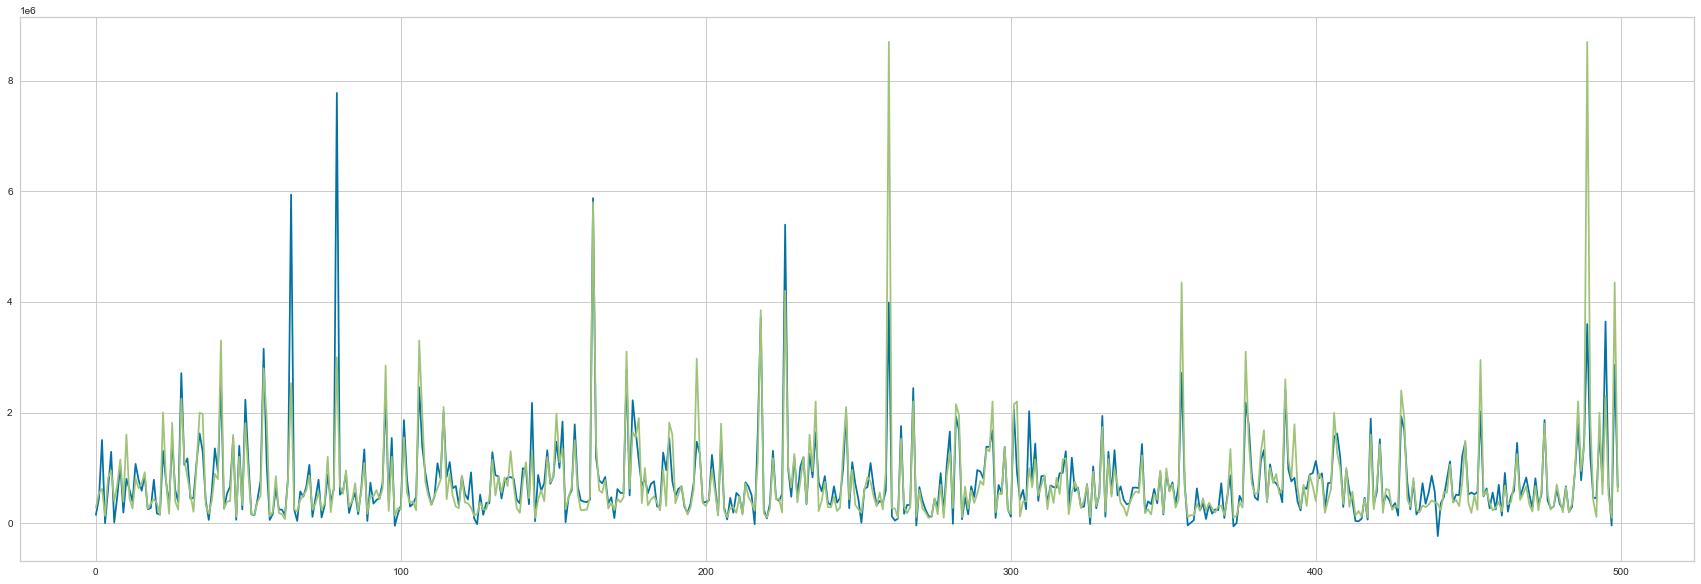

In [103]:
fig, ax = plt.subplots(figsize=(30,10))
plt.plot(lista_hold_Rm_1_yhat[:500])
plt.plot(linea_true[:500])
plt.show()

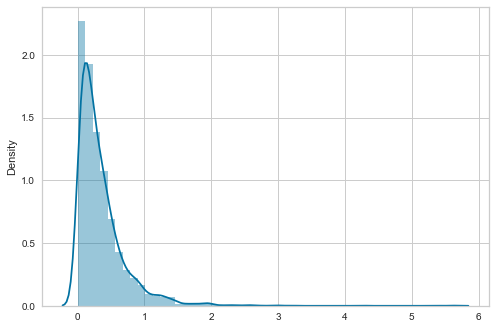

In [104]:
############NO SALE!!! sns.distplot(lista_hold_Rm_0) 

<font color= "1F284B" > Generalmente, en una distribución normal, la moda y la media coinciden. Como nuestra curva tiene esta forma decidimos coger la mediana.</font>

In [105]:
#### Poner más filtros en el clustering para ajustar la desviación 

#### <font color= "1F284B" >2. Regresión con Random Forest Regresor.</font>

#### <font color= "1F284B" >2.1. Random Forest Regresor con clase 0.</font>

<font color= "1F284B" >- Importar bibliotecas.</font>

In [106]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

<font color= "1F284B" >- Importar bibliotecas.</font>

In [107]:
X_RFR_0 = clase_0.drop(["Precio", "Clase", "Precio/m2"],axis=1).values
y_RFR_0 = clase_0["Precio"].values

<font color= "1F284B" >- Definir los datos que son para entrenamiento y los que son para testeom.</font>

In [108]:
X_RFR_0_train, X_RFR_0_test, y_RFR_0_train, y_RFR_0_test = train_test_split(X_RFR_0, y_RFR_0, test_size=0.30)

<font color= "1F284B" >- Entrenar los datos y predecir.</font>

In [109]:
regr_RFR_0 = RandomForestRegressor(max_depth=2, random_state=123456789)
regr_RFR_0 = regr_RFR_0.fit(X_RFR_0_train, y_RFR_0_train)
yhat_RFR_0 = regr_RFR_0.predict(X_RFR_0_test)

In [110]:
mean_squared_error(yhat_RFR_0,y_RFR_0_test)

20401324360.979153

In [111]:
r2_sin_ajustar_RFR_0 = regr_RFR_0.score(X_RFR_0_test, y_RFR_0_test) 
r2_ajustada_RFR_0 = 1 - (1-regr_RFR_0.score(X_RFR_0_test, y_RFR_0_test))*(len(y_RFR_0_test)-1)/(len(y_RFR_0_test)-X_RFR_0_test.shape[1]-1)

r2_sin_ajustar_RFR_0, r2_ajustada_RFR_0

(0.5871573746414054, 0.5782853984517508)

#### <font color= "1F284B" > Método de validación Hold Out y métrica .</font>

<font color= "1F284B" >- Clase 0.</font>

In [112]:
lista_hold_RFR_0 = []
for i in range(100):
    X_train_hold_RFR_0, X_test_hold_RFR_0, y_train_hold_RFR_0, y_test_hold_RFR_0 = train_test_split( X_RFR_0, y_RFR_0, test_size=0.3)

    regresion_multilineal_hold_RFR_0 = linear_model.LinearRegression()
    regresion_multilineal_hold_RFR_0.fit(X_train_hold_RFR_0, y_train_hold_RFR_0)
    yhat_hold_RFR_0 = regresion_multilineal_hold_RFR_0.predict(X_test_hold_RFR_0)

    for i,j in zip(yhat_hold_RFR_0,y_test_hold_RFR_0):
        lista_hold_RFR_0.append((abs(i - j )/ j))

<font color= "1F284B" >- Media clase 0.</font>

In [113]:
np.mean(lista_hold_RFR_0)

0.2574337386724343

<font color= "1F284B" >- Mediana clase 0.</font>

In [114]:
np.median(lista_hold_RFR_0)

0.179104789205524

<font color= "1F284B" >- Desviación estándar clase 0.</font>

In [115]:
np.std(lista_hold_RFR_0)

0.2924668656327522

In [116]:
lista_hold_RFR_0_R2 = []
for i in range(100):
    X_train_hold_RFR_0_R2, X_test_hold_RFR_0_R2, y_train_hold_RFR_0_R2, y_test_hold_RFR_0_R2 = train_test_split( X_RFR_0, y_RFR_0, test_size=0.3)

    regresion_multilineal_hold_RFR_0_R2 = linear_model.LinearRegression()
    regresion_multilineal_hold_RFR_0_R2.fit(X_train_hold_RFR_0_R2, y_train_hold_RFR_0_R2)
    yhat_hold_RFR_0_R2 = regresion_multilineal_hold_RFR_0_R2.predict(X_test_hold_RFR_0_R2)
    
    r2_ajustada_hold_RFR_0_R2 = 1 - (1-regresion_multilineal_hold_RFR_0_R2.score(X_test_hold_RFR_0_R2, y_test_hold_RFR_0_R2))*(len(y_test_hold_RFR_0_R2)-1)/(len(y_test_hold_RFR_0_R2)-X_test_hold_RFR_0_R2.shape[1]-1)
    lista_hold_RFR_0_R2.append(r2_ajustada_hold_RFR_0_R2)

In [117]:
np.mean(lista_hold_RFR_0_R2)

0.7804145303805582

<font color= "1F284B" >- Ploteamos clase 0.</font>

In [118]:
lista_hold_RFR_0 = []
lista_hold_RFR_0_yhat = []
linea_true = []
for i in range(100):
    X_train_hold_RFR_0, X_test_hold_RFR_0, y_train_hold_RFR_0, y_test_hold_RFR_0 = train_test_split( X_RFR_0, y_RFR_0, test_size=0.3)

    regresion_multilineal_hold_RFR_0 = linear_model.LinearRegression()
    regresion_multilineal_hold_RFR_0.fit(X_train_hold_RFR_0, y_train_hold_RFR_0)
    yhat_hold_RFR_0 = regresion_multilineal_hold_RFR_0.predict(X_test_hold_RFR_0)
    lista_hold_RFR_0_yhat.extend(yhat_hold_RFR_0)
    linea_true.extend(y_test_hold_RFR_0)        

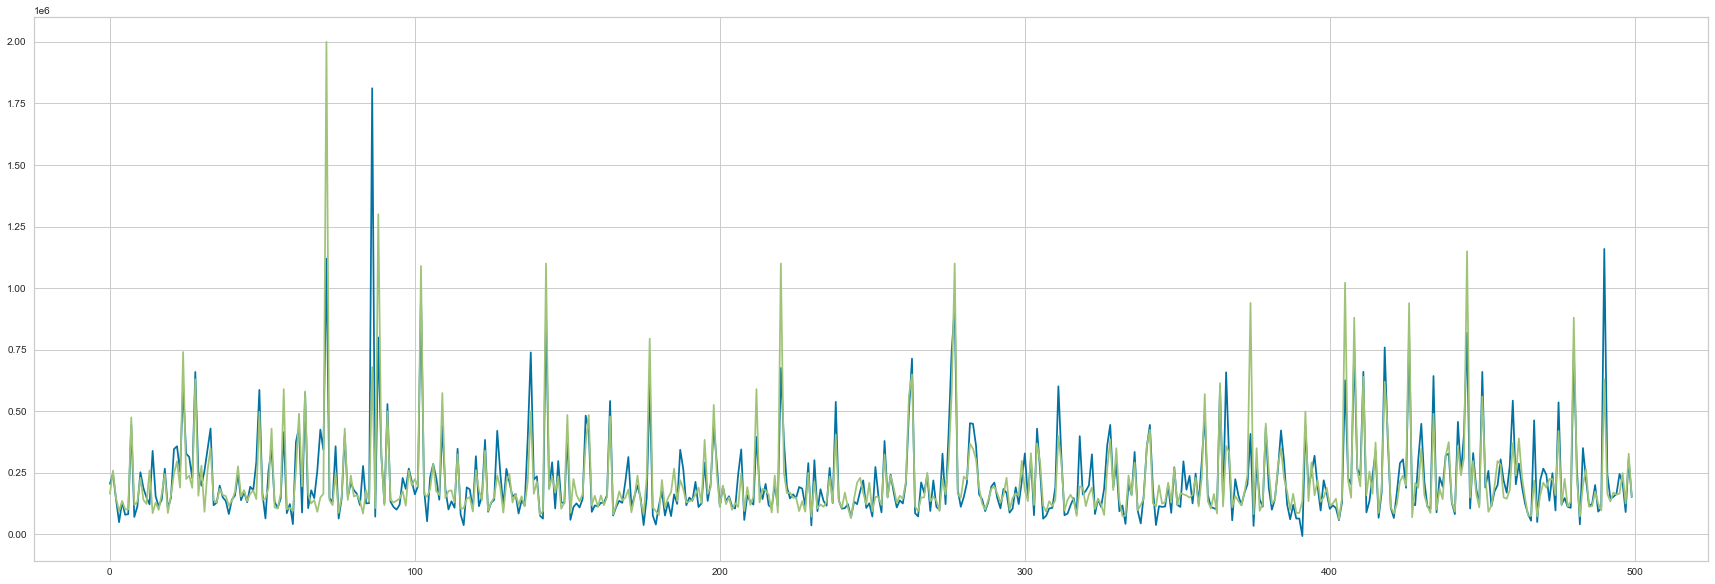

In [119]:
fig, ax = plt.subplots(figsize=(30,10))
plt.plot(lista_hold_RFR_0_yhat[:500])
plt.plot(linea_true[:500])
plt.show()

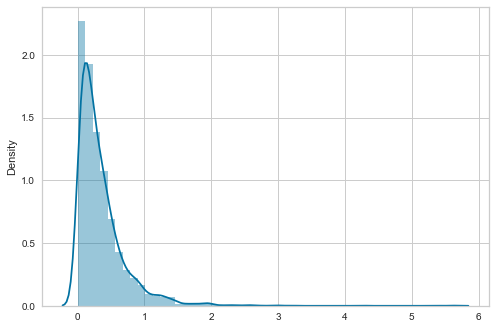

In [120]:
############NO SALE!!! sns.distplot(lista_hold_Rm_0) 

<font color= "1F284B" > Generalmente, en una distribución normal, la moda y la media coinciden. Como nuestra curva tiene esta forma decidimos coger la mediana.</font>

In [121]:
#### Poner más filtros en el clustering para ajustar la desviación 

#### <font color= "1F284B" >2.2. Random Forest Regresor con clase 1.</font>

In [122]:
X_RFR_1 = clase_1.drop(["Precio", "Clase", "Precio/m2"],axis=1).values
y_RFR_1 = clase_1["Precio"].values

In [123]:
X_RFR_1_train, X_RFR_1_test, y_RFR_1_train, y_RFR_1_test = train_test_split(X_RFR_1, y_RFR_1, test_size=0.30)

In [124]:
regr_RFR_1 = RandomForestRegressor(max_depth=2, random_state=123456789)
regr_RFR_1 = regr_RFR_1.fit(X_RFR_1_train, y_RFR_1_train)
yhat_RFR_1 = regr_RFR_1.predict(X_RFR_1_test)

In [125]:
mean_squared_error(yhat_RFR_1,y_RFR_1_test)

189934064205.81744

In [126]:
r2_sin_ajustar_RFR_1 = regr_RFR_0.score(X_RFR_1_test, y_RFR_1_test) 
r2_ajustada_RFR_1 = 1 - (1-regr_RFR_0.score(X_RFR_1_test, y_RFR_1_test))*(len(y_RFR_1_test)-1)/(len(y_RFR_1_test)-X_RFR_1_test.shape[1]-1)

r2_sin_ajustar_RFR_1, r2_ajustada_RFR_1

(0.35505345509828123, 0.34578402216293225)

#### <font color= "1F284B" > Método de validación Hold Out y métrica .</font>

<font color= "1F284B" >- Clase 1.</font>

In [127]:
lista_hold_RFR_1 = []
for i in range(100):
    X_train_hold_RFR_1, X_test_hold_RFR_1, y_train_hold_RFR_1, y_test_hold_RFR_1 = train_test_split( X_RFR_1, y_RFR_1, test_size=0.3)

    regresion_multilineal_hold_RFR_1 = linear_model.LinearRegression()
    regresion_multilineal_hold_RFR_1.fit(X_train_hold_RFR_1, y_train_hold_RFR_1)
    yhat_hold_RFR_1 = regresion_multilineal_hold_RFR_1.predict(X_test_hold_RFR_1)

    for i,j in zip(yhat_hold_RFR_1,y_test_hold_RFR_1):
        lista_hold_RFR_1.append((abs(i - j )/ j))

<font color= "1F284B" >- Media clase 1.</font>

In [128]:
np.mean(lista_hold_RFR_1)

0.35904128059238666

<font color= "1F284B" >- Mediana clase 1.</font>

In [129]:
np.median(lista_hold_RFR_1)

0.25001713430688904

<font color= "1F284B" >- Desviación estándar clase 1.</font>

In [130]:
np.std(lista_hold_RFR_1)

0.4051035499281485

In [131]:
lista_hold_RFR_1_R2 = []
for i in range(100):
    X_train_hold_RFR_1_R2, X_test_hold_RFR_1_R2, y_train_hold_RFR_1_R2, y_test_hold_RFR_1_R2 = train_test_split( X_RFR_1, y_RFR_1, test_size=0.3)

    regresion_multilineal_hold_RFR_1_R2 = linear_model.LinearRegression()
    regresion_multilineal_hold_RFR_1_R2.fit(X_train_hold_RFR_1_R2, y_train_hold_RFR_1_R2)
    yhat_hold_RFR_1_R2 = regresion_multilineal_hold_RFR_1_R2.predict(X_test_hold_RFR_1_R2)
    
    r2_ajustada_hold_RFR_1_R2 = 1 - (1-regresion_multilineal_hold_RFR_1_R2.score(X_test_hold_RFR_1_R2, y_test_hold_RFR_1_R2))*(len(y_test_hold_RFR_1_R2)-1)/(len(y_test_hold_RFR_1_R2)-X_test_hold_RFR_1_R2.shape[1]-1)
    lista_hold_RFR_1_R2.append(r2_ajustada_hold_RFR_1_R2)

In [132]:
np.mean(lista_hold_RFR_1_R2)

0.6998284142113417

<font color= "1F284B" >- Ploteamos clase 1.</font>

In [133]:
lista_hold_RFR_1 = []
lista_hold_RFR_1_yhat = []
linea_true = []
for i in range(100):
    X_train_hold_RFR_1, X_test_hold_RFR_1, y_train_hold_RFR_1, y_test_hold_RFR_1 = train_test_split( X_RFR_1, y_RFR_1, test_size=0.3)

    regresion_multilineal_hold_RFR_1 = linear_model.LinearRegression()
    regresion_multilineal_hold_RFR_1.fit(X_train_hold_RFR_1, y_train_hold_RFR_1)
    yhat_hold_RFR_1 = regresion_multilineal_hold_RFR_1.predict(X_test_hold_RFR_1)
    lista_hold_RFR_1_yhat.extend(yhat_hold_RFR_1)
    linea_true.extend(y_test_hold_RFR_1)        

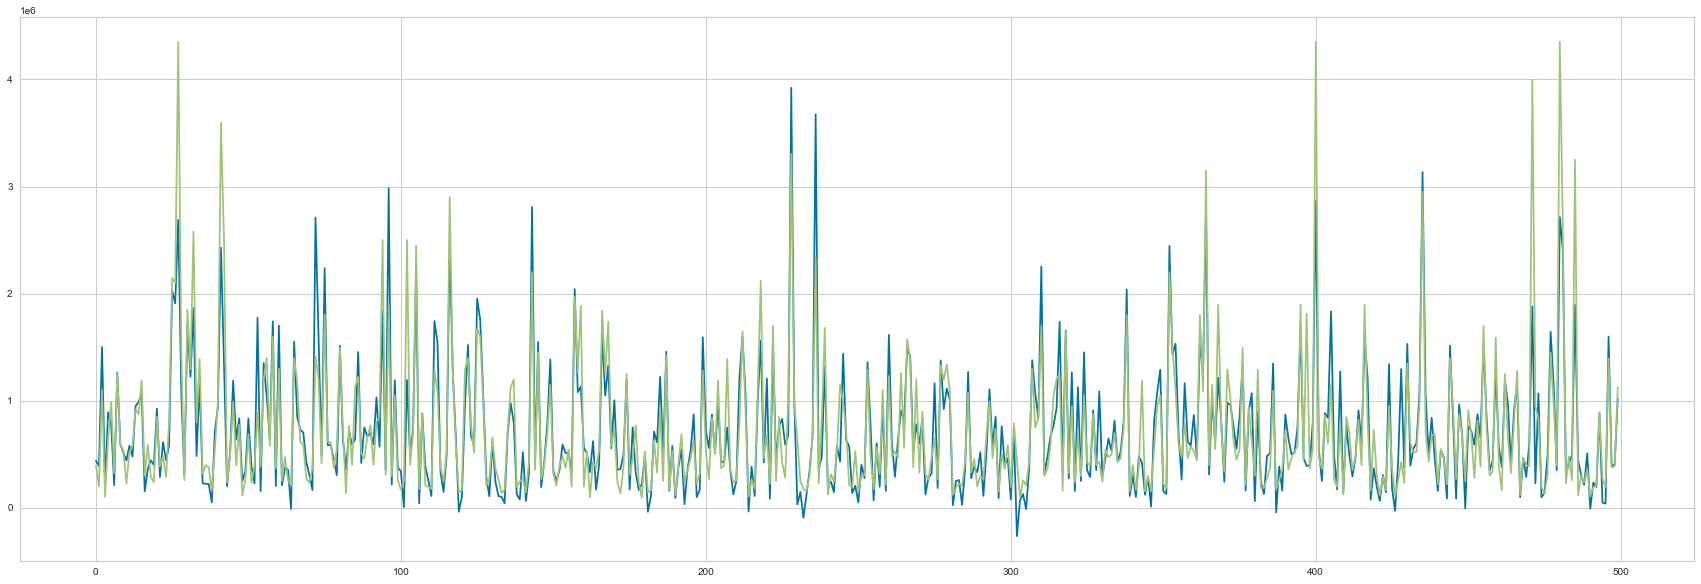

In [134]:
fig, ax = plt.subplots(figsize=(30,10))
plt.plot(lista_hold_RFR_1_yhat[:500])
plt.plot(linea_true[:500])
plt.show()

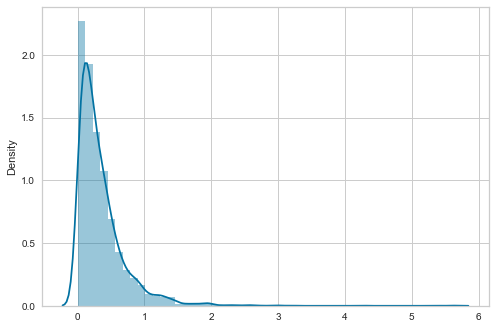

In [135]:
############NO SALE!!! sns.distplot(lista_hold_Rm_0) 

<font color= "1F284B" > Generalmente, en una distribución normal, la moda y la media coinciden. Como nuestra curva tiene esta forma decidimos coger la mediana.</font>

In [136]:
#### Poner más filtros en el clustering para ajustar la desviación 

#### <font color= "1F284B" >3. Gradient Boost Regressor.</font>

In [137]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

#### <font color= "1F284B" >3.1. Gradient Boost Regressor con clase 0.</font>

In [138]:
X_GBR_0 = clase_0.drop(["Precio", "Clase", "Precio/m2"],axis=1).values
y_GBR_0 = clase_0["Precio"].values

In [139]:
X_GBR_0_train, X_GBR_0_test, y_GBR_0_train, y_GBR_0_test = train_test_split(X_GBR_0, y_GBR_0, test_size=0.30)

In [140]:
regr_GBR_0 = GradientBoostingRegressor(random_state=123456789)
regr_GBR_0 = regr_GBR_0.fit(X_GBR_0_train, y_GBR_0_train)
yhat_GBR_0 = regr_GBR_0.predict(X_GBR_0_test)

In [141]:
mean_squared_error(yhat_GBR_0,y_GBR_0_test)

9529903421.862637

In [142]:
r2_sin_ajustar_GBR_0 = regr_GBR_0.score(X_GBR_0_test, y_GBR_0_test) 
r2_ajustada_GBR_0 = 1 - (1-regr_GBR_0.score(X_GBR_0_test, y_GBR_0_test))*(len(y_GBR_0_test)-1)/(len(y_GBR_0_test)-X_GBR_0_test.shape[1]-1)

r2_sin_ajustar_GBR_0, r2_ajustada_GBR_0

(0.8170084141789664, 0.8130759302429843)

<font color= "1F284B" >- Clase 0.</font>

In [143]:
lista_hold_GBR_0 = []
for i in range(100):
    X_train_hold_GBR_0, X_test_hold_GBR_0, y_train_hold_GBR_0, y_test_hold_GBR_0 = train_test_split( X_GBR_0, y_GBR_0, test_size=0.3)

    regresion_multilineal_hold_GBR_0 = linear_model.LinearRegression()
    regresion_multilineal_hold_GBR_0.fit(X_train_hold_GBR_0, y_train_hold_GBR_0)
    yhat_hold_GBR_0 = regresion_multilineal_hold_GBR_0.predict(X_test_hold_GBR_0)

    for i,j in zip(yhat_hold_GBR_0,y_test_hold_GBR_0):
        lista_hold_GBR_0.append((abs(i - j )/ j))

<font color= "1F284B" >- Media clase 0.</font>

In [144]:
np.mean(lista_hold_GBR_0)

0.25711405421944294

<font color= "1F284B" >- Mediana clase 0.</font>

In [145]:
np.median(lista_hold_GBR_0)

0.17831966255269743

<font color= "1F284B" >- Desviación estándar clase 0.</font>

In [146]:
np.std(lista_hold_GBR_0)

0.29368979324380606

In [147]:
lista_hold_GBR_0_R2 = []
for i in range(100):
    X_train_hold_GBR_0_R2, X_test_hold_GBR_0_R2, y_train_hold_GBR_0_R2, y_test_hold_GBR_0_R2 = train_test_split( X_GBR_0, y_GBR_0, test_size=0.3)

    regresion_multilineal_hold_GBR_0_R2 = linear_model.LinearRegression()
    regresion_multilineal_hold_GBR_0_R2.fit(X_train_hold_GBR_0_R2, y_train_hold_GBR_0_R2)
    yhat_hold_GBR_0_R2 = regresion_multilineal_hold_GBR_0_R2.predict(X_test_hold_GBR_0_R2)
    
    r2_ajustada_hold_GBR_0_R2 = 1 - (1-regresion_multilineal_hold_GBR_0_R2.score(X_test_hold_GBR_0_R2, y_test_hold_GBR_0_R2))*(len(y_test_hold_GBR_0_R2)-1)/(len(y_test_hold_GBR_0_R2)-X_test_hold_GBR_0_R2.shape[1]-1)
    lista_hold_GBR_0_R2.append(r2_ajustada_hold_GBR_0_R2)

In [148]:
np.mean(lista_hold_GBR_0_R2)

0.7821011683457461

<font color= "1F284B" >- Ploteamos clase 0.</font>

In [149]:
lista_hold_GBR_0 = []
lista_hold_GBR_0_yhat = []
linea_true = []
for i in range(100):
    X_train_hold_GBR_0, X_test_hold_GBR_0, y_train_hold_GBR_0, y_test_hold_GBR_0 = train_test_split( X_GBR_0, y_GBR_0, test_size=0.3)

    regresion_multilineal_hold_GBR_0 = linear_model.LinearRegression()
    regresion_multilineal_hold_GBR_0.fit(X_train_hold_GBR_0, y_train_hold_GBR_0)
    yhat_hold_GBR_0 = regresion_multilineal_hold_GBR_0.predict(X_test_hold_GBR_0)
    lista_hold_GBR_0_yhat.extend(yhat_hold_GBR_0)
    linea_true.extend(y_test_hold_GBR_0)        

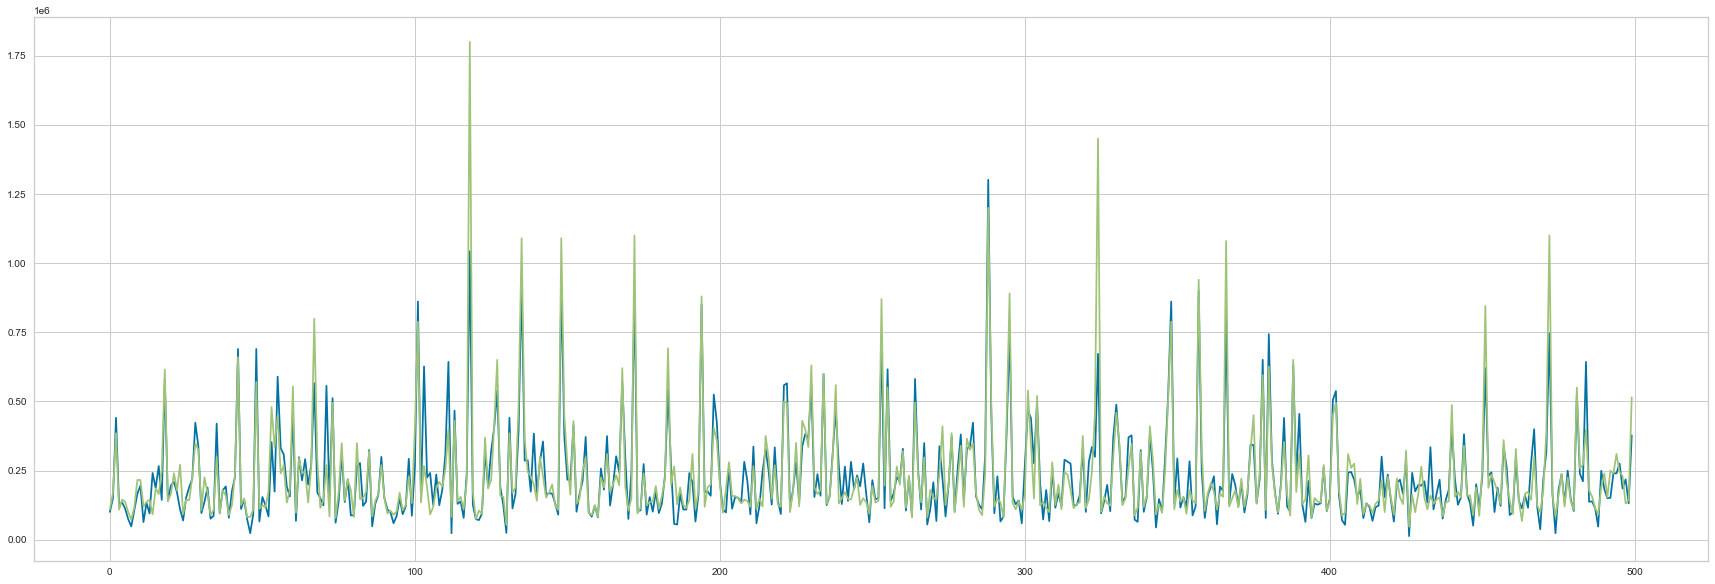

In [150]:
fig, ax = plt.subplots(figsize=(30,10))
plt.plot(lista_hold_GBR_0_yhat[:500])
plt.plot(linea_true[:500])
plt.show()

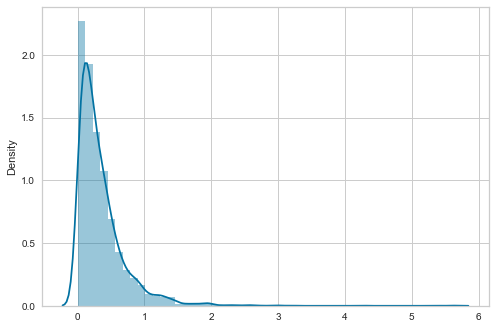

In [151]:
############NO SALE!!! sns.distplot(lista_hold_Rm_0) 

<font color= "1F284B" > Generalmente, en una distribución normal, la moda y la media coinciden. Como nuestra curva tiene esta forma decidimos coger la mediana.</font>

In [152]:
#### Poner más filtros en el clustering para ajustar la desviación 

#### <font color= "1F284B" >3.2. Gradient Boost Regressor con clase 1.</font>

In [153]:
X_GBR_1 = clase_1.drop(["Precio", "Clase", "Precio/m2"],axis=1).values
y_GBR_1 = clase_1["Precio"].values

In [154]:
X_GBR_1_train, X_GBR_1_test, y_GBR_1_train, y_GBR_1_test = train_test_split(X_GBR_1, y_GBR_1, test_size=0.30)

In [155]:
regr_GBR_1 = GradientBoostingRegressor(random_state=123456789)
regr_GBR_1 = regr_GBR_1.fit(X_GBR_1_train, y_GBR_1_train)
yhat_GBR_1 = regr_GBR_1.predict(X_GBR_1_test)

In [156]:
mean_squared_error(yhat_GBR_1,y_GBR_1_test)

95612632666.89328

In [157]:
r2_sin_ajustar_GBR_1 = regr_GBR_1.score(X_GBR_1_test, y_GBR_1_test) 
r2_ajustada_GBR_1 = 1 - (1-regr_GBR_1.score(X_GBR_1_test, y_GBR_1_test))*(len(y_GBR_1_test)-1)/(len(y_GBR_1_test)-X_GBR_1_test.shape[1]-1)

r2_sin_ajustar_GBR_1, r2_ajustada_GBR_1

(0.8206573188635079, 0.8180797332195788)

#### <font color= "1F284B" > Método de validación Hold Out y métrica .</font>

<font color= "1F284B" >- Clase 1.</font>

In [158]:
lista_hold_GBR_1 = []
for i in range(100):
    X_train_hold_GBR_1, X_test_hold_GBR_1, y_train_hold_GBR_1, y_test_hold_GBR_1 = train_test_split( X_GBR_1, y_GBR_1, test_size=0.3)

    regresion_multilineal_hold_GBR_1 = linear_model.LinearRegression()
    regresion_multilineal_hold_GBR_1.fit(X_train_hold_GBR_1, y_train_hold_GBR_1)
    yhat_hold_GBR_1 = regresion_multilineal_hold_GBR_1.predict(X_test_hold_GBR_1)

    for i,j in zip(yhat_hold_GBR_1,y_test_hold_GBR_1):
        lista_hold_GBR_1.append((abs(i - j )/ j))

<font color= "1F284B" >- Media clase 1.</font>

In [159]:
np.mean(lista_hold_GBR_1)

0.3589354469355498

<font color= "1F284B" >- Mediana clase 1.</font>

In [160]:
np.median(lista_hold_GBR_1)

0.24899616049942985

<font color= "1F284B" >- Desviación estándar clase 1.</font>

In [161]:
np.std(lista_hold_GBR_1)

0.4042884161092716

In [162]:
lista_hold_GBR_1_R2 = []
for i in range(100):
    X_train_hold_GBR_1_R2, X_test_hold_GBR_1_R2, y_train_hold_GBR_1_R2, y_test_hold_GBR_1_R2 = train_test_split( X_GBR_1, y_GBR_1, test_size=0.3)

    regresion_multilineal_hold_GBR_1_R2 = linear_model.LinearRegression()
    regresion_multilineal_hold_GBR_1_R2.fit(X_train_hold_GBR_1_R2, y_train_hold_GBR_1_R2)
    yhat_hold_GBR_1_R2 = regresion_multilineal_hold_GBR_1_R2.predict(X_test_hold_GBR_1_R2)
    
    r2_ajustada_hold_GBR_1_R2 = 1 - (1-regresion_multilineal_hold_GBR_1_R2.score(X_test_hold_GBR_1_R2, y_test_hold_GBR_1_R2))*(len(y_test_hold_GBR_1_R2)-1)/(len(y_test_hold_GBR_1_R2)-X_test_hold_GBR_1_R2.shape[1]-1)
    lista_hold_GBR_1_R2.append(r2_ajustada_hold_GBR_1_R2)

In [163]:
np.mean(lista_hold_GBR_1_R2)

0.7043731306111108

<font color= "1F284B" >- Ploteamos clase 1.</font>

In [164]:
lista_hold_GBR_1 = []
lista_hold_GBR_1_yhat = []
linea_true = []
for i in range(100):
    X_train_hold_GBR_1, X_test_hold_GBR_1, y_train_hold_GBR_1, y_test_hold_GBR_1 = train_test_split( X_GBR_1, y_GBR_1, test_size=0.3)

    regresion_multilineal_hold_GBR_1 = linear_model.LinearRegression()
    regresion_multilineal_hold_GBR_1.fit(X_train_hold_GBR_1, y_train_hold_GBR_1)
    yhat_hold_GBR_1 = regresion_multilineal_hold_GBR_1.predict(X_test_hold_GBR_1)
    lista_hold_GBR_1_yhat.extend(yhat_hold_GBR_1)
    linea_true.extend(y_test_hold_GBR_1)        

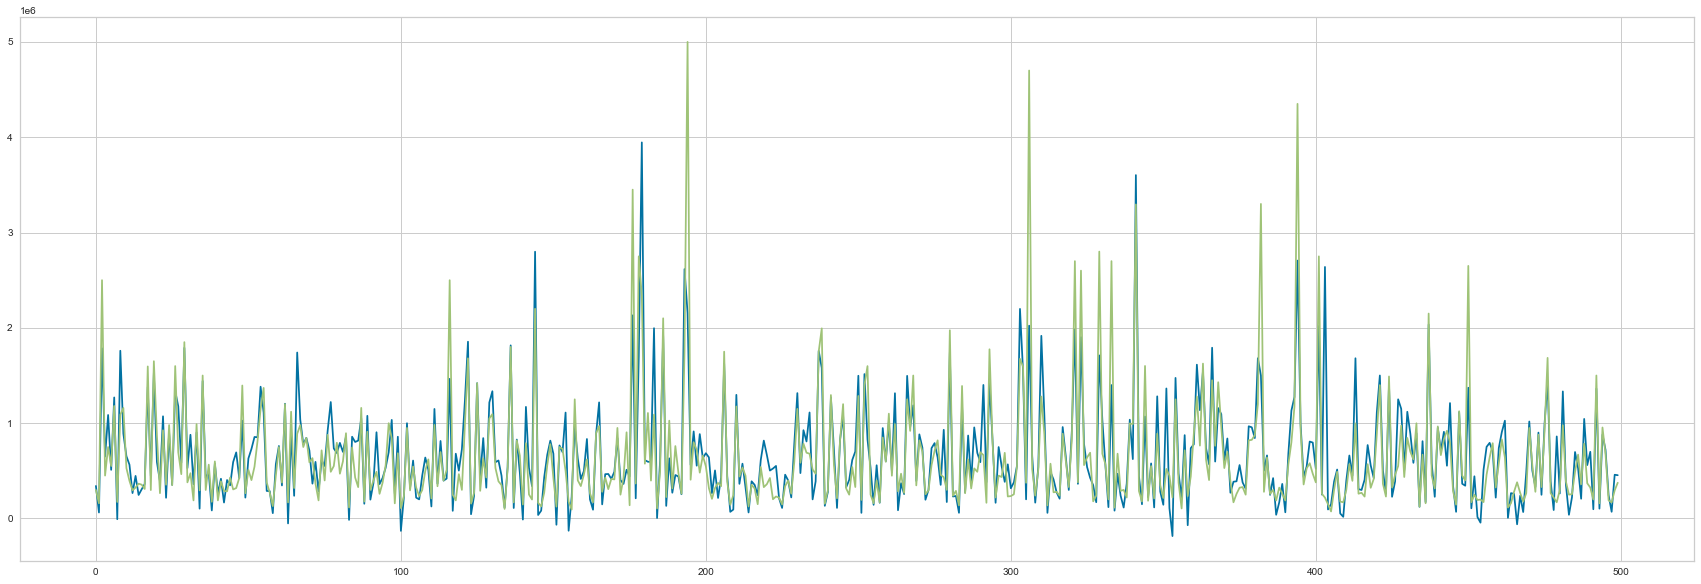

In [165]:
fig, ax = plt.subplots(figsize=(30,10))
plt.plot(lista_hold_GBR_1_yhat[:500])
plt.plot(linea_true[:500])
plt.show()

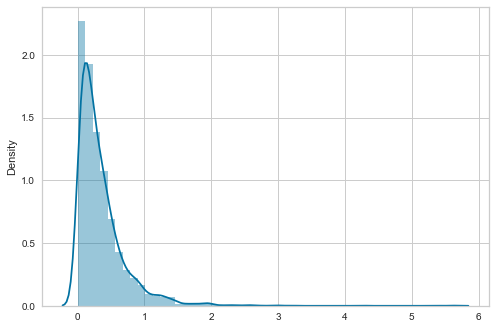

In [166]:
############NO SALE!!! sns.distplot(lista_hold_Rm_0) 

<font color= "1F284B" > Generalmente, en una distribución normal, la moda y la media coinciden. Como nuestra curva tiene esta forma decidimos coger la mediana.</font>

In [167]:
#### Poner más filtros en el clustering para ajustar la desviación 

------

##### <font color= "1F284B" >PASO 5. HACER LOS MEJORES MODELOS CON TODOS LOS DATOS Y DESCARGARLOS.</font>

<font color= "1F284B" >- Importar bibliotecas.</font>

In [ ]:
import pickle

<font color= "1F284B" >- El mejor modelo para la clase 0 es Regresión multilineal:.</font>

In [ ]:
clase_0_final = pisos[pisos["Clase"]==0]

In [ ]:
X_Rm_0_final = clase_0_final.drop(["Precio", "Clase", "Precio/m2"],axis=1).values
y_Rm_0_final = clase_0_final["Precio"].values

In [ ]:
regresion_multilineal_Rm_0_final = GradientBoostingRegressor(random_state=123456789)
regresion_multilineal_Rm_0_final = regresion_multilineal_Rm_0_final.fit(X_Rm_0_final, y_Rm_0_final)

<font color= "1F284B" >- Descargamos el modelo de regresión multilineal que ha sido el mejor para la clase 0.</font>

In [ ]:
file_clase0 = "Gradient Boost_clase0.pkl"
with open(file_clase0, 'wb') as file:
    pickle.dump(regresion_multilineal_Rm_0_final, file)

<font color= "1F284B" >- El mejor modelo para la clase 1 es Gradient Boost:.</font>

In [ ]:
clase_1_final = pisos[pisos["Clase"]==1]

In [ ]:
X_GBR_1_final = clase_1_final.drop(["Precio", "Clase", "Precio/m2"],axis=1).values
y_GBR_1_final = clase_1_final["Precio"].values

In [ ]:
regr_GBR_1_final = GradientBoostingRegressor(random_state=123456789)
regr_GBR_1_final = regr_GBR_1_final.fit(X_GBR_1_final, y_GBR_1_final)

<font color= "1F284B" >- Descargamos el modelo de gradient boost que ha sido el mejor para la clase 1.</font>

In [ ]:
file_clase1 = "Gradient Boost_clase1.pkl"
with open(file_clase1, 'wb') as file:
    pickle.dump(regr_GBR_1_final, file)

##### <font color= "1F284B" >PASO 6. GUARDAR EL CLASIFICADOR RANDOM FOREST PARA CLASIFICAR FUTUROS PISOS.</font>

In [ ]:
file_clasificador = "Clasificador Random Forest.pkl"
with open(file_clasificador, 'wb') as file:
    pickle.dump(clf_RF, file)